In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Load the dataset
labels_data = pd.read_csv("../Data/labels.csv")
values_data = pd.read_csv("../Data/values.csv")

In [4]:
labels_data

patient_id  heart_disease_present
0       0z64un                      0
1       ryoo3j                      0
2       yt1s1x                      1
3       l2xjde                      1
4       oyt4ek                      0
..         ...                    ...
175     5qfar3                      1
176     2s2b1f                      1
177     nsd00i                      1
178     0xw93k                      0
179     2nx10r                      0

[180 rows x 2 columns]

In [5]:
values_data

patient_id  slope_of_peak_exercise_st_segment               thal  \
0       0z64un                                  1             normal   
1       ryoo3j                                  2             normal   
2       yt1s1x                                  1             normal   
3       l2xjde                                  1  reversible_defect   
4       oyt4ek                                  3  reversible_defect   
..         ...                                ...                ...   
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128                2                  0   
1                       110                3                  0   
2                       125                4                  3   
3                       152                4                  0   
4                       178                1                  0   
..                      ...              ...                ...   
175                     125                4                  2   
176                     180                4                  0   
177                     125                3                  0   
178                     124                3                  2   
179                     160                3                  1   

     fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                       0                    2   
1                                       0                    0   
2                                       0                    2   
3                                       0                    0   
4                                       0                    2   
..                                    ...                  ...   
175                                     1                    0   
176                                     0                    1   
177                                     0                    0   
178                                     1                    0   
179                                     0                    0   

     serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                            308                       0.0    1   45   
1                            214                       1.6    0   54   
2                            304                       0.0    1   77   
3                            223                       0.0    1   40   
4                            270                       4.2    1   59   
..                           ...                       ...  ...  ...   
175                          254                       0.2    1   67   
176                          327                       3.4    0   55   
177                          309                       1.8    1   64   
178                          255                       0.0    1   48   
179                          201                       0.0    0   54   

     max_heart_rate_achieved  exercise_induced_angina  
0                        170                        0  
1                        158                        0  
2                        162                        1  
3                        181                        0  
4                        145                        0  
..                       ...                      ...  
175                      163                        0  
176                      117                        1  
177                      131                        1  
178                      175                        0  
179                      163                        0  

[18

In [6]:
#Merge the two datasets on 'patient_id'
merged_df = pd.merge(values_data, labels_data, on='patient_id', how='left')
merged_df.head()

patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0   
2                                     0                    2   
3                                     0                    0   
4                                     0                    2   

   serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                          308                       0.0    1   45   
1                          214                       1.6    0   54   
2                          304                       0.0    1   77   
3                          223                       0.0    1   40   
4                          270                       4.2    1   59   

   max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
0                      170                        0                      0  
1                      158                        0                      0  
2                      162                        1                      1  
3                      181                        0                      1  
4                      145                        0                      0

In [ ]:
# Create a copy of the merged dataframe for further analysis
df = merged_df.copy()

df.head()

patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0   
2                                     0                    2   
3                                     0                    0   
4                                     0                    2   

   serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                          308                       0.0    1   45   
1                          214                       1.6    0   54   
2                          304                       0.0    1   77   
3                          223                       0.0    1   40   
4                          270                       4.2    1   59   

   max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
0                      170                        0                      0  
1                      158                        0                      0  
2                      162                        1                      1  
3                      181                        0                      1  
4                      145                        0                      0

In [26]:
df.shape

(180, 15)

In [ ]:
# Display column names
df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [28]:
# Display dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [41]:
# statistical summary
df.describe()

slope_of_peak_exercise_st_segment  resting_blood_pressure  \
count                         180.000000              180.000000   
mean                            1.550000              131.311111   
std                             0.618838               17.010443   
min                             1.000000               94.000000   
25%                             1.000000              120.000000   
50%                             1.000000              130.000000   
75%                             2.000000              140.000000   
max                             3.000000              180.000000   

       chest_pain_type  num_major_vessels  \
count       180.000000         180.000000   
mean          3.155556           0.694444   
std           0.938454           0.969347   
min           1.000000           0.000000   
25%           3.000000           0.000000   
50%           3.000000           0.000000   
75%           4.000000           1.000000   
max           4.000000           3.000000   

       fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
count                            180.000000           180.000000   
mean                               0.161111             1.050000   
std                                0.368659             0.998742   
min                                0.000000             0.000000   
25%                                0.000000             0.000000   
50%                                0.000000             2.000000   
75%                                0.000000             2.000000   
max                                1.000000             2.000000   

       serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression         sex  \
count                   180.000000                180.000000  180.000000   
mean                    249.211111                  1.010000    0.688889   
std                      52.717969                  1.121357    0.464239   
min                     126.000000                  0.000000    0.000000   
25%                     213.750000                  0.000000    0.000000   
50%                     245.500000                  0.800000    1.000000   
75%                     281.250000                  1.600000    1.000000   
max                     564.000000                  6.200000    1.000000   

              age  max_heart_rate_achieved  exercise_induced_angina  \
count  180.000000               180.000000               180.000000   
mean    54.811111               149.483333                 0.316667   
std      9.334737                22.063513                 0.466474   
min     29.000000                96.000000                 0.000000   
25%     48.000000               132.000000                 0.000000   
50%     55.000000               152.000000                 0.000000   
75%     62.000000               166.250000                 1.000000   
max     77.000000               202.000000                 1.000000   

       heart_disease_present  
count             180.000000  
mean                0.444444  
std                 0.498290  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 1.000000  
max                 1.000000

In [42]:
df.describe(include = "O")

patient_id    thal
count         180     180
unique        180       3
top        0z64un  normal
freq            1      98

In [30]:
# Check for missing values  
df.isna().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [37]:
df.nunique()


patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

In [39]:
df.sex.value_counts()

sex
1    124
0     56
Name: count, dtype: int64

In [88]:
gender = pd.DataFrame({
    "Count": df['sex'].value_counts(),
    "Percentage": df['sex'].value_counts(normalize=True) * 100
})

gender


Count  Percentage
sex                   
1      124   68.888889
0       56   31.111111

In [40]:
df.heart_disease_present.value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

In [47]:
target = pd.DataFrame({
    "Count": df['heart_disease_present'].value_counts(),
    "Percentage": df['heart_disease_present'].value_counts(normalize=True) * 100
})

target


Count  Percentage
heart_disease_present                   
0                        100   55.555556
1                         80   44.444444

# visualizations

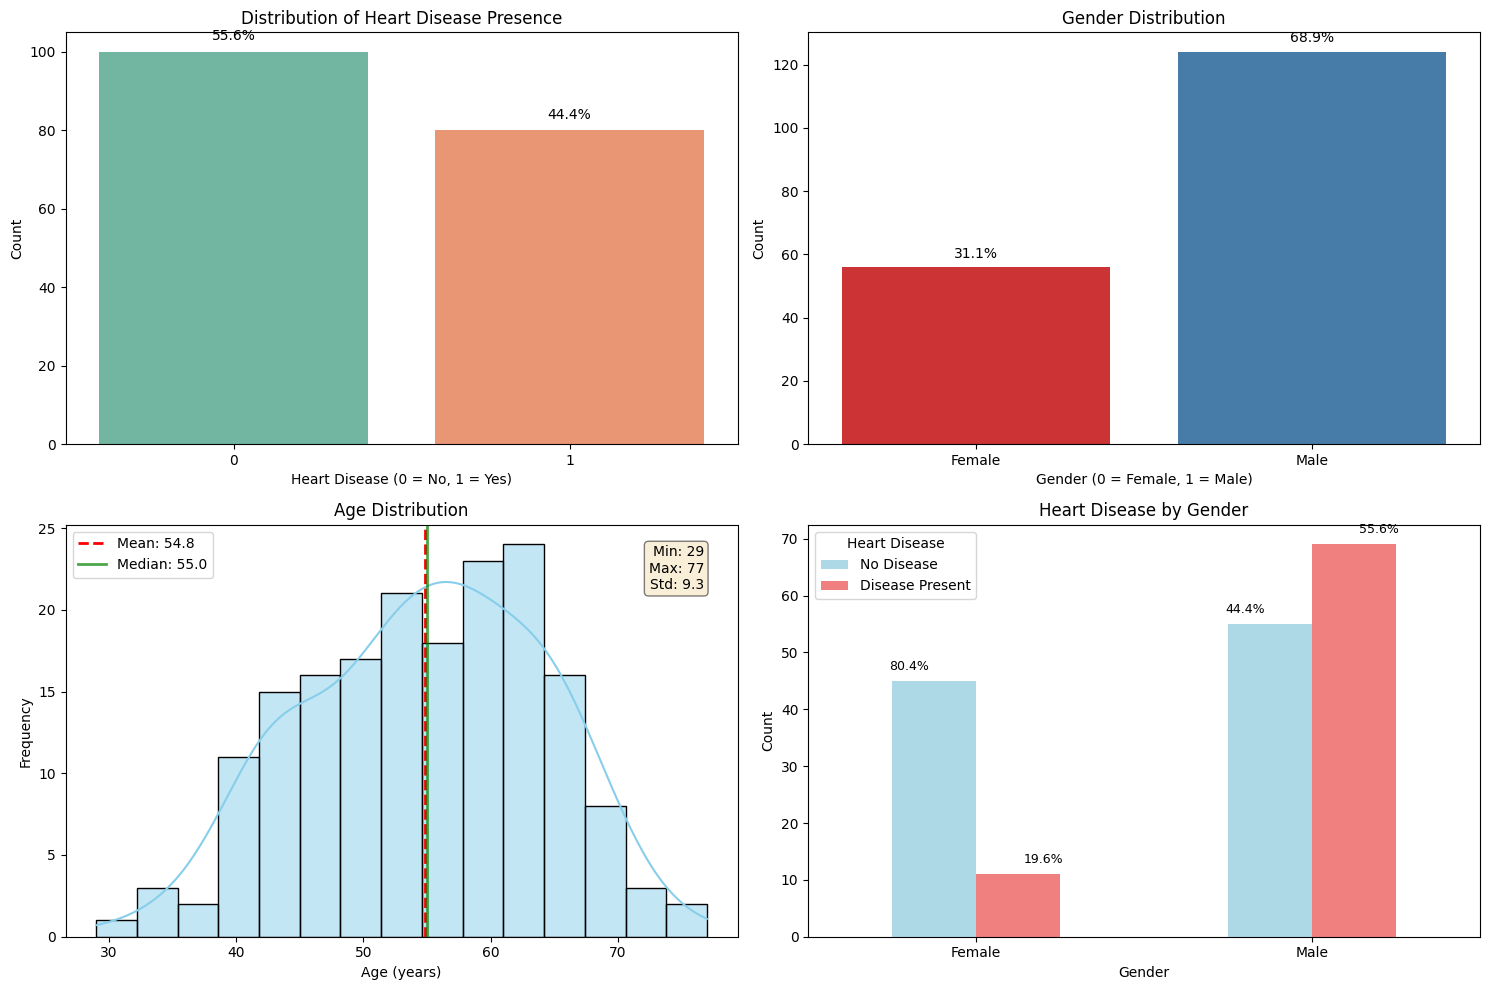


ADDITIONAL AGE ANALYSIS BY HEART DISEASE STATUS


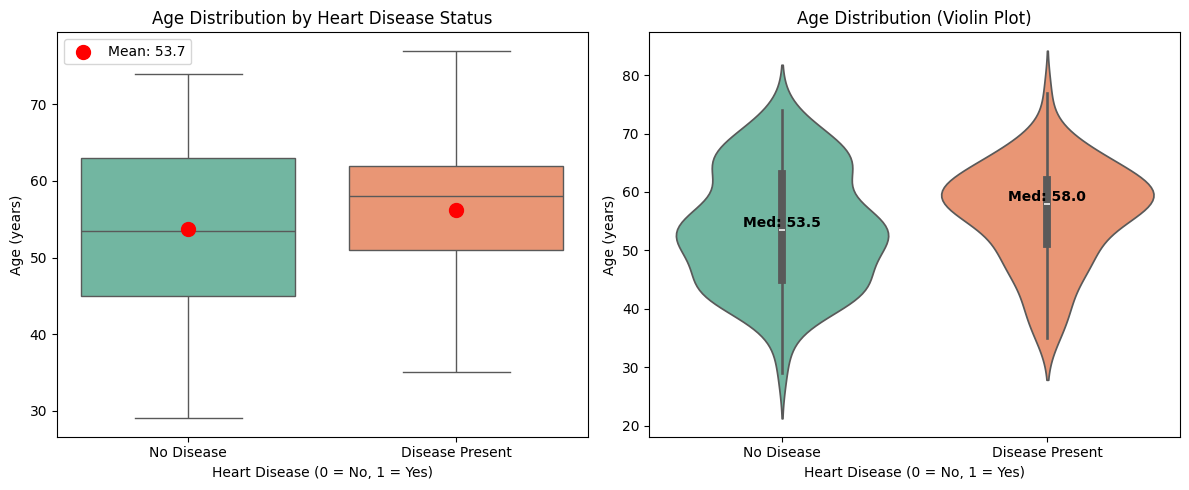


STATISTICAL SUMMARY

1. Age Statistics by Heart Disease Status:
----------------------------------------

No Disease:
  Count: 100
  Mean age: 53.7 years
  Median age: 53.5 years
  Std deviation: 9.8 years
  Age range: 29 - 74 years

Disease Present:
  Count: 80
  Mean age: 56.2 years
  Median age: 58.0 years
  Std deviation: 8.6 years
  Age range: 35 - 77 years


2. Gender Distribution by Heart Disease Status:
----------------------------------------

No Disease:
  Female: 45.0%
  Male: 55.0%

Disease Present:
  Female: 13.8%
  Male: 86.2%


3. Disease Prevalence by Gender:
----------------------------------------
Female: 19.6% have heart disease
Male: 55.6% have heart disease


In [10]:
# Create a 2x2 grid of subplots for comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# ===== PLOT 1: Heart Disease Distribution (Top Left) =====
sns.countplot(x='heart_disease_present', data=df, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Heart Disease Presence')
axes[0, 0].set_xlabel('Heart Disease (0 = No, 1 = Yes)')
axes[0, 0].set_ylabel('Count')

# Add percentage labels on bars
total = len(df)
for p in axes[0, 0].patches:
    height = p.get_height()
    axes[0, 0].text(p.get_x() + p.get_width()/2., height + 3,
                   f'{height/total*100:.1f}%', ha='center')

# ===== PLOT 2: Gender/Sex Distribution (Top Right) =====
gender_counts = df['sex'].value_counts()
gender_labels = {0: 'Female', 1: 'Male'}
gender_percentages = df['sex'].value_counts(normalize=True) * 100

# Create bar plot
sns.countplot(x='sex', data=df, palette='Set1', ax=axes[0, 1], 
              order=sorted(df['sex'].unique()))
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender (0 = Female, 1 = Male)')
axes[0, 1].set_ylabel('Count')

# Update x-tick labels
axes[0, 1].set_xticklabels(['Female', 'Male'])

# Add percentage labels on bars
for p, gender in zip(axes[0, 1].patches, sorted(df['sex'].unique())):
    height = p.get_height()
    axes[0, 1].text(p.get_x() + p.get_width()/2., height + 3,
                   f'{gender_percentages[gender]:.1f}%', ha='center')

# ===== PLOT 3: Age Distribution (Bottom Left) =====
# Create histogram of age
sns.histplot(data=df, x='age', kde=True, ax=axes[1, 0], color='skyblue', bins=15)
axes[1, 0].set_title('Age Distribution')
axes[1, 0].set_xlabel('Age (years)')
axes[1, 0].set_ylabel('Frequency')

# Add vertical lines for mean and median
mean_age = df['age'].mean()
median_age = df['age'].median()

axes[1, 0].axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')
axes[1, 0].axvline(median_age, color='green', linestyle='-', linewidth=2, alpha=0.7, label=f'Median: {median_age:.1f}')
axes[1, 0].legend()

# Add summary statistics as text
stats_text = f'Min: {df["age"].min()}\nMax: {df["age"].max()}\nStd: {df["age"].std():.1f}'
axes[1, 0].text(0.95, 0.95, stats_text, transform=axes[1, 0].transAxes,
               verticalalignment='top', horizontalalignment='right',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ===== PLOT 4: Heart Disease by Gender (Bottom Right) =====
# Create grouped bar chart
heart_disease_by_gender = pd.crosstab(df['sex'], df['heart_disease_present'])
heart_disease_by_gender_percentage = heart_disease_by_gender.div(heart_disease_by_gender.sum(axis=1), axis=0) * 100

# Plot
heart_disease_by_gender.plot(kind='bar', ax=axes[1, 1], color=['lightblue', 'lightcoral'])
axes[1, 1].set_title('Heart Disease by Gender')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticklabels(['Female', 'Male'], rotation=0)
axes[1, 1].legend(['No Disease', 'Disease Present'], title='Heart Disease')

# Add percentage labels on bars
for i, (gender_idx, row) in enumerate(heart_disease_by_gender.iterrows()):
    total_gender = row.sum()
    for j, (disease_status, count) in enumerate(row.items()):
        percentage = (count / total_gender) * 100
        axes[1, 1].text(i + (-0.2 + j*0.4), count + 2, 
                       f'{percentage:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# ===== ADDITIONAL ANALYSIS: Age by Heart Disease Status =====
print("\n" + "="*60)
print("ADDITIONAL AGE ANALYSIS BY HEART DISEASE STATUS")
print("="*60)

# Create separate figure for age comparison
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Box plot of age by heart disease status
sns.boxplot(x='heart_disease_present', y='age', data=df, palette='Set2', ax=ax1)
ax1.set_title('Age Distribution by Heart Disease Status')
ax1.set_xlabel('Heart Disease (0 = No, 1 = Yes)')
ax1.set_ylabel('Age (years)')
ax1.set_xticklabels(['No Disease', 'Disease Present'])

# Add mean points
for i, disease_status in enumerate([0, 1]):
    mean_age = df[df['heart_disease_present'] == disease_status]['age'].mean()
    ax1.scatter(i, mean_age, color='red', s=100, zorder=5, label=f'Mean: {mean_age:.1f}' if i == 0 else None)
ax1.legend()

# Plot 2: Violin plot with KDE
sns.violinplot(x='heart_disease_present', y='age', data=df, palette='Set2', ax=ax2)
ax2.set_title('Age Distribution (Violin Plot)')
ax2.set_xlabel('Heart Disease (0 = No, 1 = Yes)')
ax2.set_ylabel('Age (years)')
ax2.set_xticklabels(['No Disease', 'Disease Present'])

# Add median lines
for i, disease_status in enumerate([0, 1]):
    median_age = df[df['heart_disease_present'] == disease_status]['age'].median()
    ax2.text(i, median_age, f'Med: {median_age:.1f}', 
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ===== STATISTICAL SUMMARY =====
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)

# Age statistics by disease status
print("\n1. Age Statistics by Heart Disease Status:")
print("-" * 40)
for disease_status, label in [(0, "No Disease"), (1, "Disease Present")]:
    age_data = df[df['heart_disease_present'] == disease_status]['age']
    print(f"\n{label}:")
    print(f"  Count: {len(age_data)}")
    print(f"  Mean age: {age_data.mean():.1f} years")
    print(f"  Median age: {age_data.median():.1f} years")
    print(f"  Std deviation: {age_data.std():.1f} years")
    print(f"  Age range: {age_data.min()} - {age_data.max()} years")

# Gender distribution by disease status
print("\n\n2. Gender Distribution by Heart Disease Status:")
print("-" * 40)
gender_by_disease = pd.crosstab(df['heart_disease_present'], df['sex'], 
                                 normalize='index') * 100
gender_by_disease.columns = ['Female', 'Male']

for disease_status, label in [(0, "No Disease"), (1, "Disease Present")]:
    print(f"\n{label}:")
    if disease_status in gender_by_disease.index:
        row = gender_by_disease.loc[disease_status]
        print(f"  Female: {row['Female']:.1f}%")
        print(f"  Male: {row['Male']:.1f}%")

# Disease prevalence by gender
print("\n\n3. Disease Prevalence by Gender:")
print("-" * 40)
for gender, label in [(0, "Female"), (1, "Male")]:
    gender_data = df[df['sex'] == gender]
    if len(gender_data) > 0:
        disease_rate = (gender_data['heart_disease_present'].sum() / len(gender_data)) * 100
        print(f"{label}: {disease_rate:.1f}% have heart disease")

CATEGORICAL FEATURES ANALYSIS


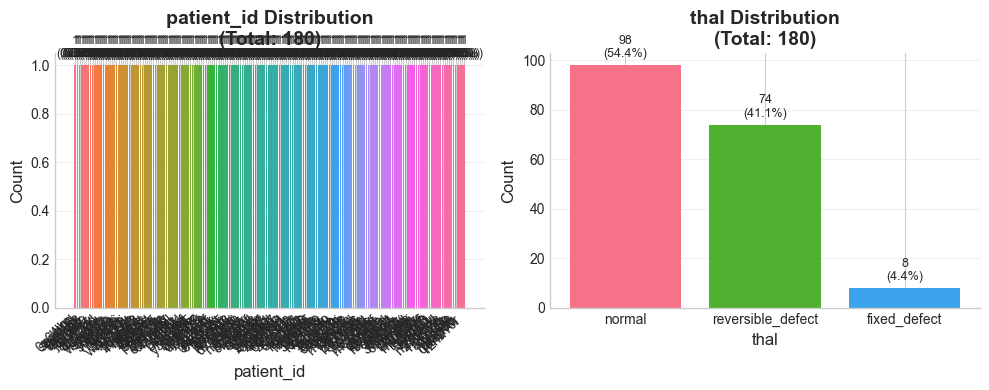

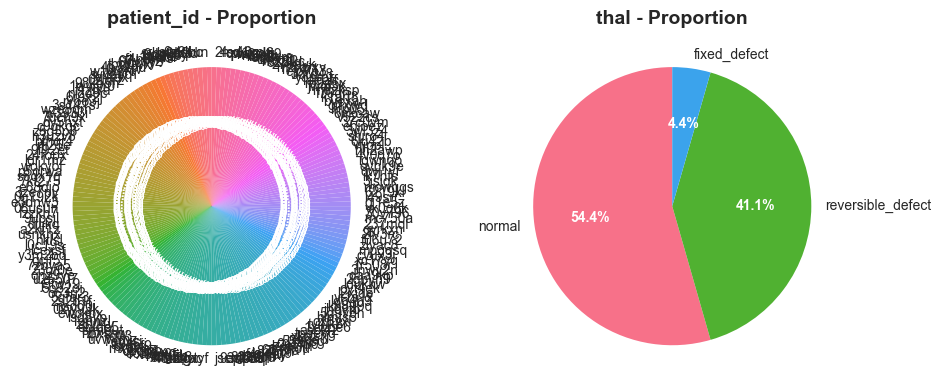


NUMERICAL (INTEGER) FEATURES ANALYSIS

Binary Features (4): ['fasting_blood_sugar_gt_120_mg_per_dl', 'sex', 'exercise_induced_angina', 'heart_disease_present']


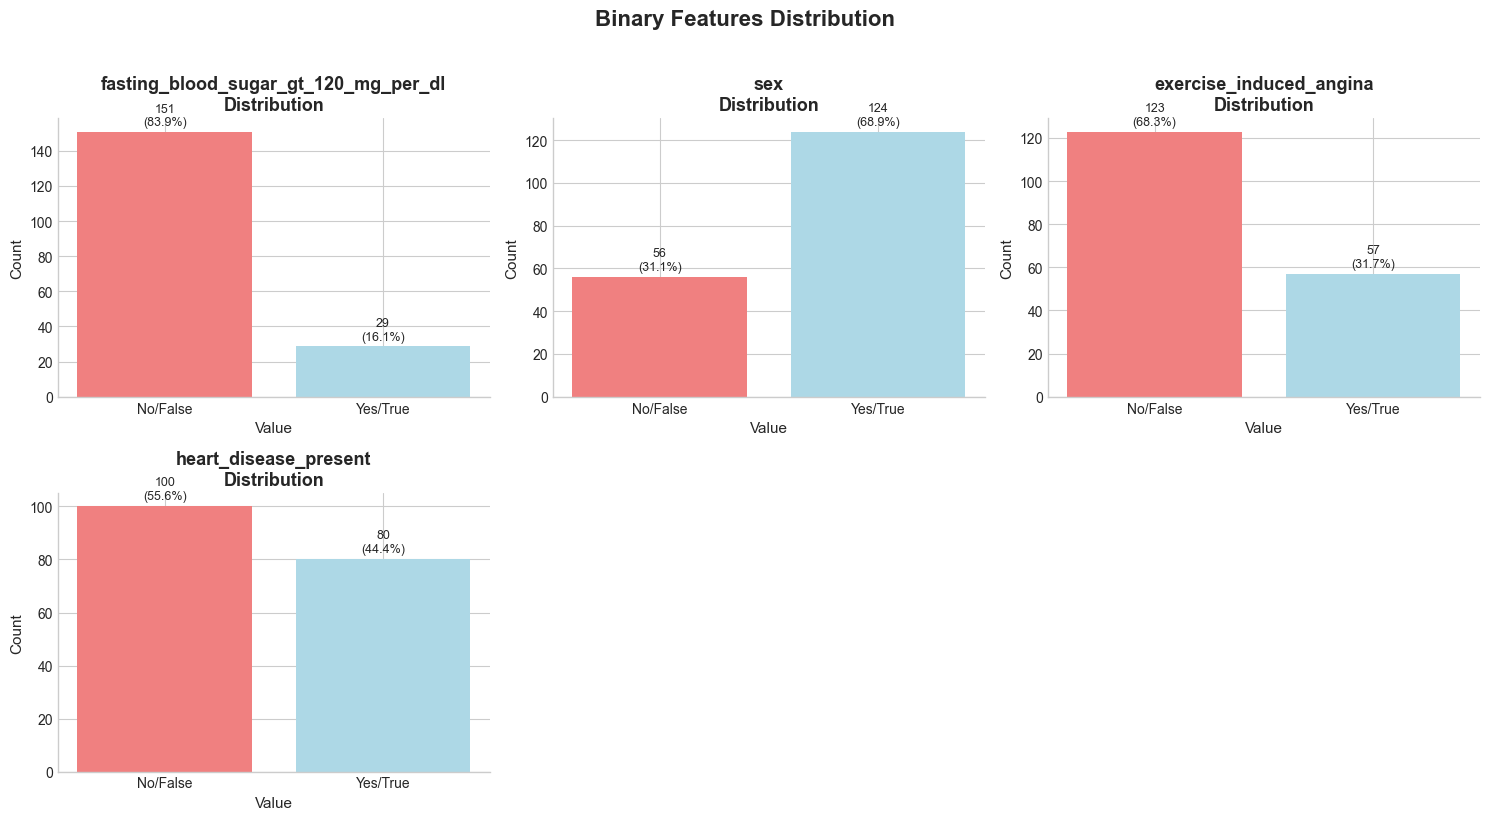


Non-Binary Integer Features (8): ['slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'age', 'max_heart_rate_achieved']


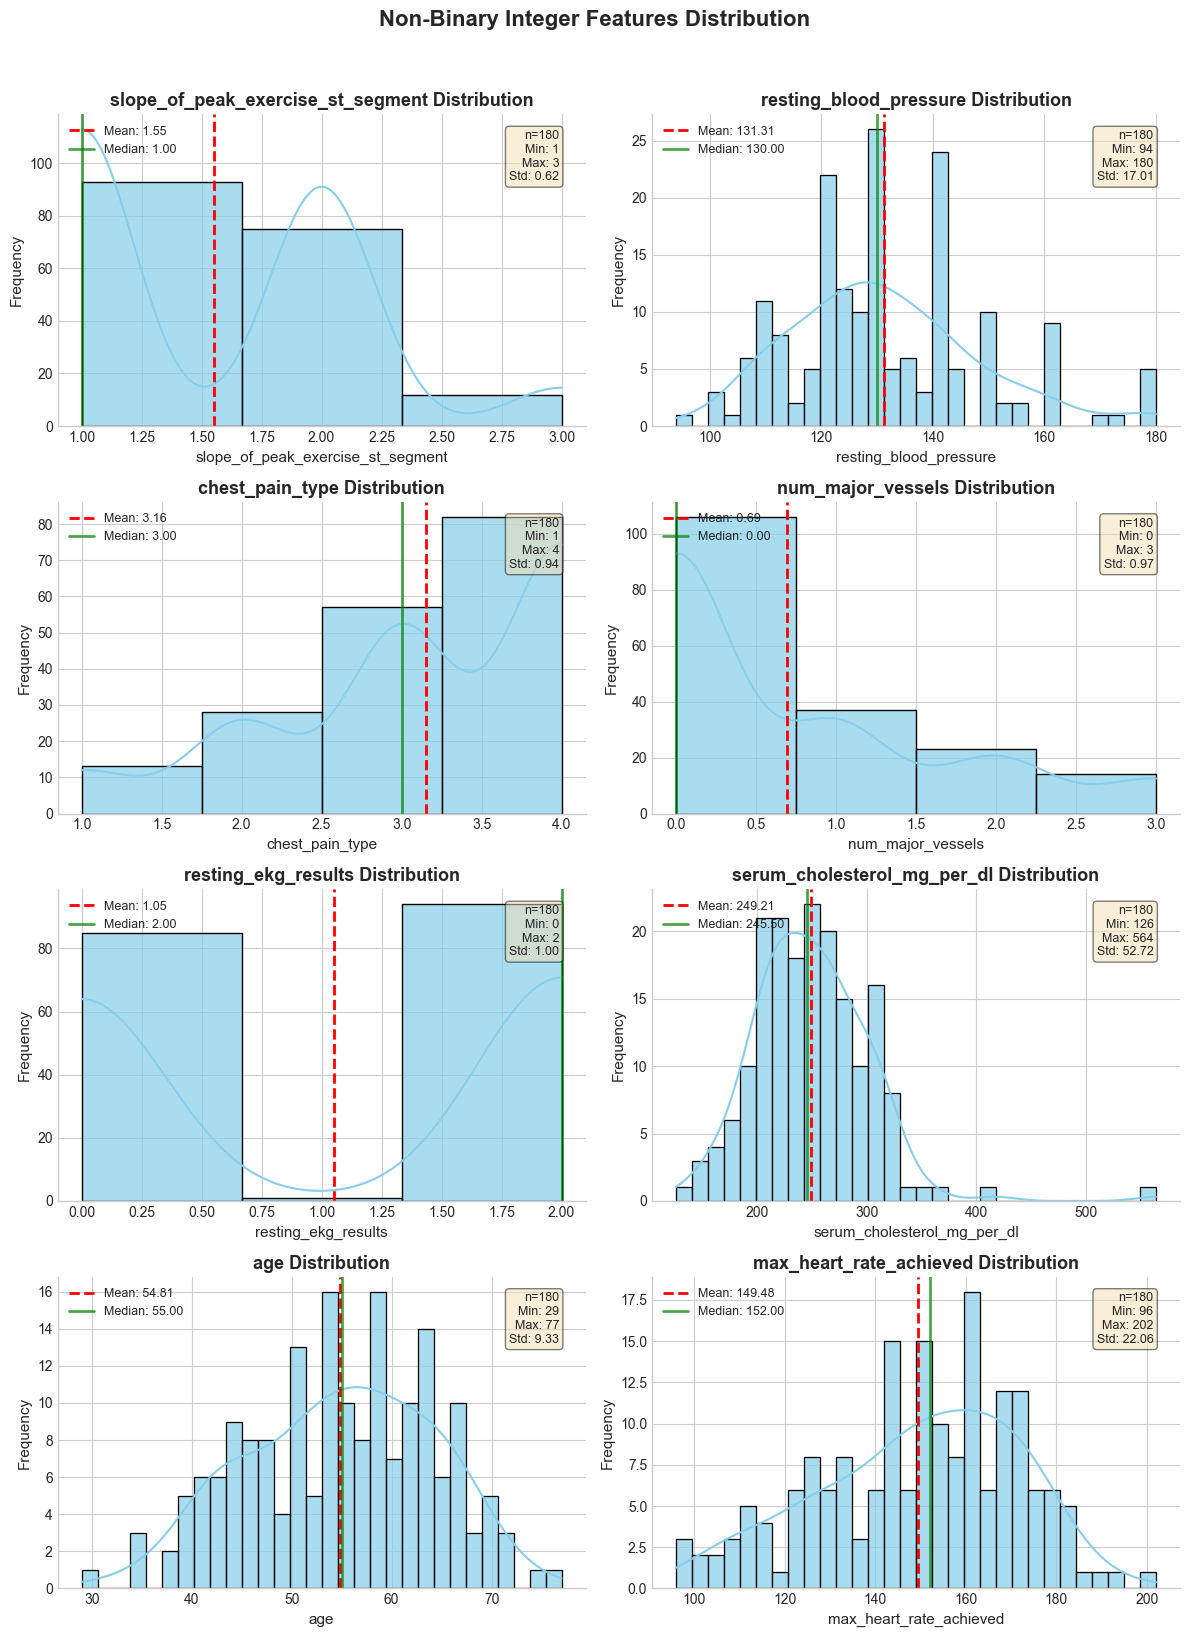


BOX PLOTS FOR OUTLIER DETECTION


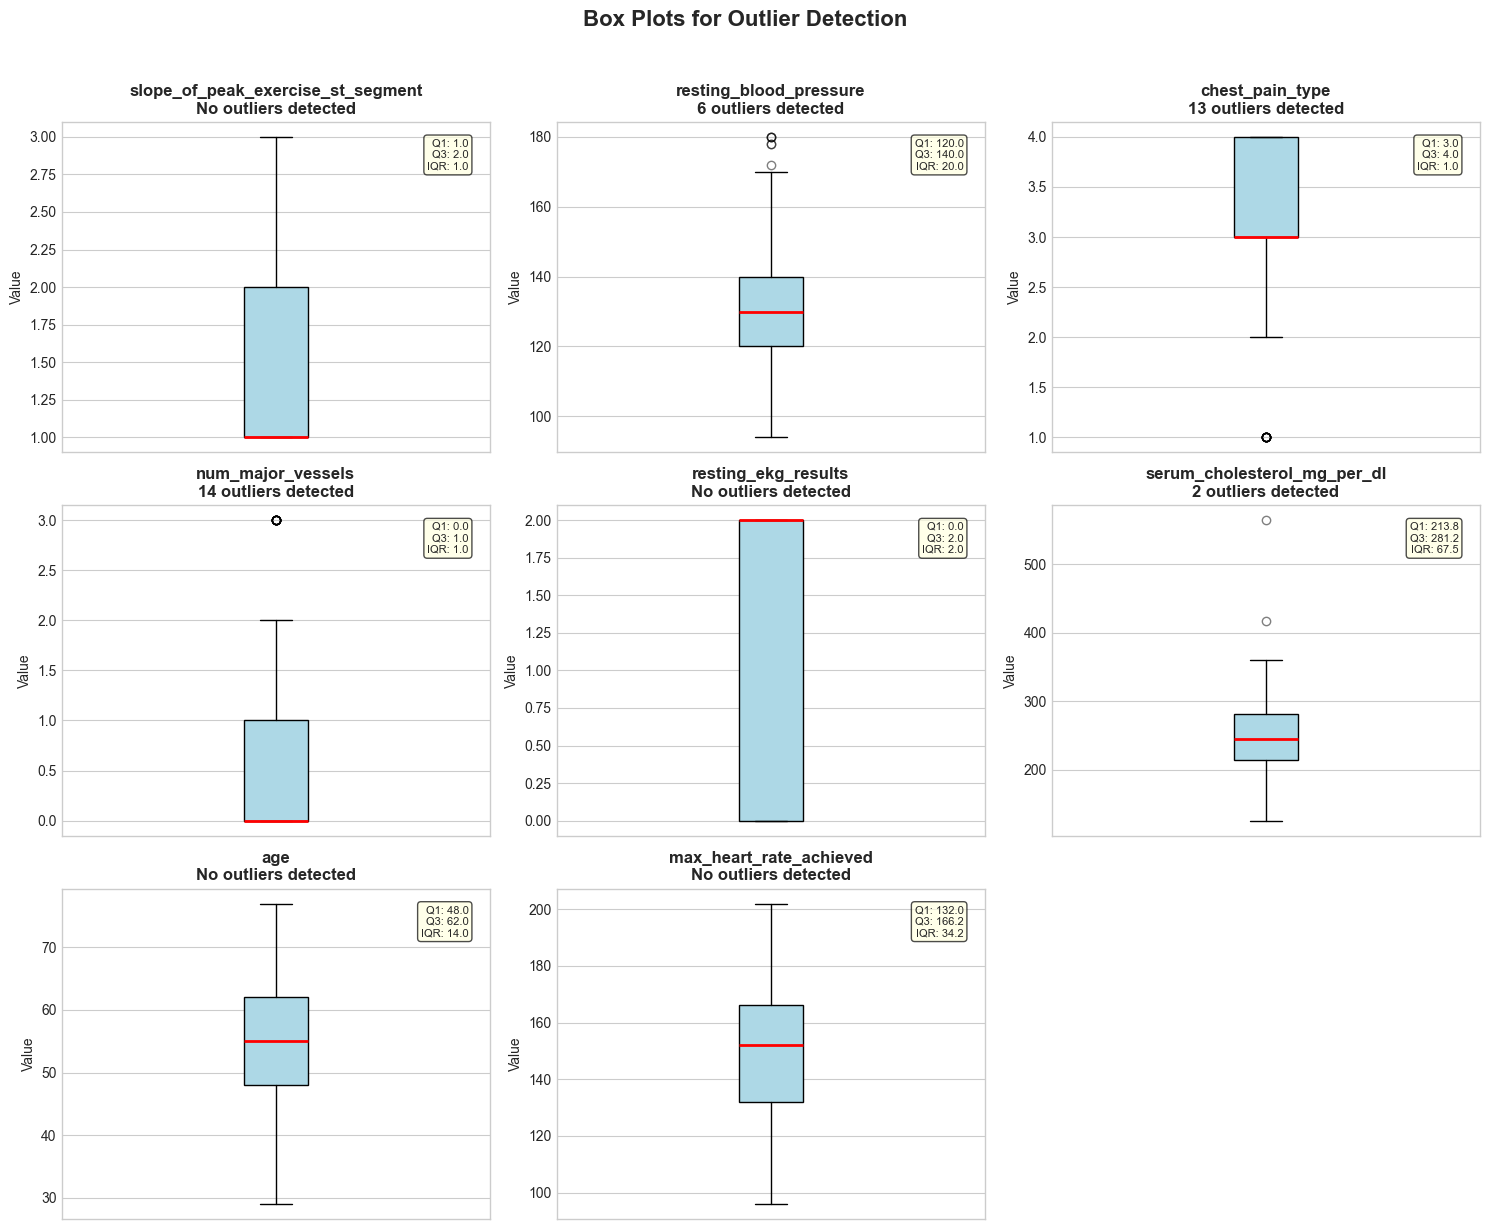


FLOAT FEATURES ANALYSIS


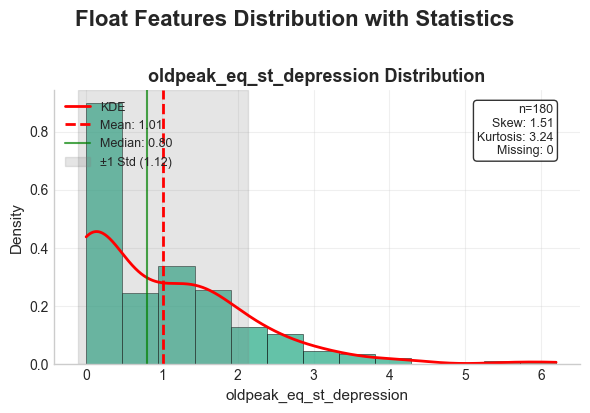


SUMMARY STATISTICS FOR ALL FEATURES
                                     Data Type Non-Null Count Null Count Null % Unique Values  Min  Max        Mean Median        Std  Skewness  Kurtosis
slope_of_peak_exercise_st_segment        int64            180          0    0.0             3    1    3        1.55    1.0   0.618838   0.66615 -0.505045
thal                                    object            180          0    0.0             3  NaN  NaN         NaN    NaN        NaN       NaN       NaN
resting_blood_pressure                   int64            180          0    0.0            36   94  180  131.311111  130.0  17.010443   0.65708  0.473105
chest_pain_type                          int64            180          0    0.0             4    1    4    3.155556    3.0   0.938454 -0.849258 -0.277853
num_major_vessels                        int64            180          0    0.0             4    0    3    0.694444    0.0   0.969347  1.167999  0.138008
fasting_blood_sugar_gt_120_mg_per_dl   

In [13]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ============================================================================
# 1. OBJECT (CATEGORICAL) FEATURES VISUALIZATION
# ============================================================================
print("=" * 70)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 70)

object_cols = df.select_dtypes(include=["object"]).columns.tolist()

if object_cols:
    # Create subplot grid for categorical features
    n_cols = len(object_cols)
    fig, axes = plt.subplots(1, n_cols, figsize=(5*n_cols, 4))
    
    if n_cols == 1:
        axes = [axes]
    
    for idx, col in enumerate(object_cols):
        ax = axes[idx]
        
        # Get value counts and percentages
        value_counts = df[col].value_counts()
        percentages = (value_counts / len(df)) * 100
        
        # Create bar plot with sorted order
        bars = ax.bar(range(len(value_counts)), value_counts.values, 
                     color=sns.color_palette("husl", len(value_counts)))
        ax.set_title(f'{col} Distribution\n(Total: {len(df)})', fontsize=14, fontweight='bold')
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        
        # Set x-ticks with category names
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45 if len(value_counts) > 3 else 0, 
                          ha='right' if len(value_counts) > 3 else 'center')
        
        # Add value and percentage labels on top of bars
        for i, (val, count) in enumerate(value_counts.items()):
            percentage = percentages[val]
            ax.text(i, count + max(value_counts.values)*0.02, 
                   f'{count}\n({percentage:.1f}%)', 
                   ha='center', va='bottom', fontsize=9)
        
        # Add grid for better readability
        ax.grid(True, alpha=0.3, axis='y')
        
        # Remove spines for cleaner look
        ax.spines[['top', 'right']].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Create pie charts for better proportion visualization
    if object_cols:
        fig, axes = plt.subplots(1, n_cols, figsize=(5*n_cols, 4))
        if n_cols == 1:
            axes = [axes]
        
        for idx, col in enumerate(object_cols):
            ax = axes[idx]
            value_counts = df[col].value_counts()
            
            # Create pie chart
            wedges, texts, autotexts = ax.pie(value_counts.values, 
                                             labels=value_counts.index,
                                             autopct='%1.1f%%',
                                             startangle=90,
                                             colors=sns.color_palette("husl", len(value_counts)),
                                             textprops={'fontsize': 10})
            
            ax.set_title(f'{col} - Proportion', fontsize=14, fontweight='bold')
            
            # Make autopct text bold
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
        
        plt.tight_layout()
        plt.show()

else:
    print("No object (categorical) columns found.")

# ============================================================================
# 2. INTEGER FEATURES VISUALIZATION
# ============================================================================
print("\n" + "=" * 70)
print("NUMERICAL (INTEGER) FEATURES ANALYSIS")
print("=" * 70)

int_cols = df.select_dtypes(include=["int", "int64"]).columns.tolist()

if int_cols:
    # Separate binary and non-binary integer features
    binary_cols = []
    non_binary_cols = []
    
    for col in int_cols:
        unique_vals = df[col].nunique()
        if unique_vals == 2 and set(df[col].dropna().unique()).issubset({0, 1}):
            binary_cols.append(col)
        else:
            non_binary_cols.append(col)
    
    # ===== VISUALIZE BINARY FEATURES =====
    if binary_cols:
        print(f"\nBinary Features ({len(binary_cols)}): {binary_cols}")
        
        # Create grid for binary features
        n_binary = len(binary_cols)
        n_rows = (n_binary + 2) // 3  # Up to 3 columns per row
        n_cols = min(3, n_binary)
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
        axes = axes.flatten() if n_binary > 1 else [axes]
        
        for idx, col in enumerate(binary_cols):
            if idx < len(axes):
                ax = axes[idx]
                
                # Get value counts
                value_counts = df[col].value_counts().sort_index()
                labels = {0: 'No/False', 1: 'Yes/True'}
                bar_labels = [labels.get(i, str(i)) for i in value_counts.index]
                
                # Create bar plot
                bars = ax.bar(range(len(value_counts)), value_counts.values, 
                             color=['lightcoral', 'lightblue'])
                ax.set_title(f'{col}\nDistribution', fontsize=13, fontweight='bold')
                ax.set_xlabel('Value', fontsize=11)
                ax.set_ylabel('Count', fontsize=11)
                
                # Set x-ticks
                ax.set_xticks(range(len(value_counts)))
                ax.set_xticklabels(bar_labels)
                
                # Add value and percentage labels
                total = value_counts.sum()
                for i, (val, count) in enumerate(value_counts.items()):
                    percentage = (count / total) * 100
                    ax.text(i, count + total*0.01, 
                           f'{count}\n({percentage:.1f}%)', 
                           ha='center', va='bottom', fontsize=9)
                
                # Remove spines for cleaner look
                ax.spines[['top', 'right']].set_visible(False)
        
        # Hide unused subplots
        for idx in range(len(binary_cols), len(axes)):
            axes[idx].set_visible(False)
        
        plt.suptitle('Binary Features Distribution', fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()
    
    # ===== VISUALIZE NON-BINARY INTEGER FEATURES =====
    if non_binary_cols:
        print(f"\nNon-Binary Integer Features ({len(non_binary_cols)}): {non_binary_cols}")
        
        # Create grid for non-binary features
        n_features = len(non_binary_cols)
        n_rows = (n_features + 1) // 2  # 2 columns per row
        n_cols = min(2, n_features)
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
        
        if n_features == 1:
            axes = [[axes]]
        elif n_rows == 1:
            axes = [axes]
        
        axes = np.array(axes).flatten()
        
        for idx, col in enumerate(non_binary_cols):
            if idx < len(axes):
                ax = axes[idx]
                data = df[col].dropna()
                
                # Create histogram with KDE
                sns.histplot(data=data, kde=True, ax=ax, bins=min(30, data.nunique()), 
                            color='skyblue', edgecolor='black', alpha=0.7)
                
                # Add vertical lines for mean and median
                mean_val = data.mean()
                median_val = data.median()
                
                ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                          label=f'Mean: {mean_val:.2f}')
                ax.axvline(median_val, color='green', linestyle='-', linewidth=2, alpha=0.7,
                          label=f'Median: {median_val:.2f}')
                
                # Add title with statistics
                stats_text = f'n={len(data)}\nMin: {data.min()}\nMax: {data.max()}\nStd: {data.std():.2f}'
                ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
                       verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                       fontsize=9)
                
                ax.set_title(f'{col} Distribution', fontsize=13, fontweight='bold')
                ax.set_xlabel(col, fontsize=11)
                ax.set_ylabel('Frequency', fontsize=11)
                ax.legend(loc='upper left', fontsize=9)
                
                # Remove top and right spines
                ax.spines[['top', 'right']].set_visible(False)
        
        # Hide unused subplots
        for idx in range(len(non_binary_cols), len(axes)):
            axes[idx].set_visible(False)
        
        plt.suptitle('Non-Binary Integer Features Distribution', fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()
    
    # ===== CREATE BOX PLOTS FOR OUTLIER DETECTION =====
    if non_binary_cols:
        print("\n" + "=" * 70)
        print("BOX PLOTS FOR OUTLIER DETECTION")
        print("=" * 70)
        
        n_features = len(non_binary_cols)
        n_rows = (n_features + 2) // 3
        n_cols = min(3, n_features)
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
        axes = axes.flatten() if n_features > 1 else [axes]
        
        for idx, col in enumerate(non_binary_cols):
            if idx < len(axes):
                ax = axes[idx]
                data = df[col].dropna()
                
                # Create box plot
                bp = ax.boxplot(data, vert=True, patch_artist=True, 
                               boxprops=dict(facecolor='lightblue'),
                               medianprops=dict(color='red', linewidth=2),
                               whiskerprops=dict(color='black'),
                               capprops=dict(color='black'),
                               flierprops=dict(marker='o', color='red', alpha=0.5))
                
                # Calculate outliers
                Q1 = data.quantile(0.25)
                Q3 = data.quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                outliers = data[(data < lower_bound) | (data > upper_bound)]
                
                # Add title with outlier info
                title = f'{col}\n'
                if len(outliers) > 0:
                    title += f'{len(outliers)} outliers detected'
                else:
                    title += 'No outliers detected'
                
                ax.set_title(title, fontsize=12, fontweight='bold')
                ax.set_ylabel('Value', fontsize=10)
                ax.set_xticks([])
                
                # Add text with IQR information
                iqr_text = f'Q1: {Q1:.1f}\nQ3: {Q3:.1f}\nIQR: {IQR:.1f}'
                ax.text(0.95, 0.95, iqr_text, transform=ax.transAxes,
                       verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7),
                       fontsize=8)
        
        # Hide unused subplots
        for idx in range(len(non_binary_cols), len(axes)):
            axes[idx].set_visible(False)
        
        plt.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()

else:
    print("No integer columns found.")

# ============================================================================
# 3. FLOAT FEATURES VISUALIZATION
# ============================================================================
print("\n" + "=" * 70)
print("FLOAT FEATURES ANALYSIS")
print("=" * 70)

float_cols = df.select_dtypes(include=["float", "float64"]).columns.tolist()

if float_cols:
    n_floats = len(float_cols)
    n_rows = (n_floats + 1) // 2
    n_cols = min(2, n_floats)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
    
    if n_floats == 1:
        axes = [[axes]]
    elif n_rows == 1:
        axes = [axes]
    
    axes = np.array(axes).flatten()
    
    for idx, col in enumerate(float_cols):
        if idx < len(axes):
            ax = axes[idx]
            data = df[col].dropna()
            
            # Create enhanced histogram
            n_bins = min(30, int(np.sqrt(len(data))))
            hist_color = plt.cm.viridis(0.6)
            
            # Histogram with density
            n, bins, patches = ax.hist(data, bins=n_bins, alpha=0.7, color=hist_color,
                                      edgecolor='black', linewidth=0.5, density=True)
            
            # Add KDE
            kde = stats.gaussian_kde(data)
            x_range = np.linspace(data.min(), data.max(), 1000)
            ax.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
            
            # Add vertical lines for statistics
            mean_val = data.mean()
            median_val = data.median()
            std_val = data.std()
            
            ax.axvline(mean_val, color='red', linestyle='--', linewidth=2,
                      label=f'Mean: {mean_val:.2f}')
            ax.axvline(median_val, color='green', linestyle='-', linewidth=1.5, alpha=0.7,
                      label=f'Median: {median_val:.2f}')
            
            # Add shaded area for ±1 standard deviation
            ax.axvspan(mean_val - std_val, mean_val + std_val, alpha=0.2, color='gray',
                      label=f'±1 Std ({std_val:.2f})')
            
            # Add statistical information
            stats_text = (f'n={len(data):,}\n'
                         f'Skew: {data.skew():.2f}\n'
                         f'Kurtosis: {data.kurtosis():.2f}\n'
                         f'Missing: {df[col].isnull().sum()}')
            
            ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                   fontsize=9)
            
            ax.set_title(f'{col} Distribution', fontsize=13, fontweight='bold')
            ax.set_xlabel(col, fontsize=11)
            ax.set_ylabel('Density', fontsize=11)
            ax.legend(loc='upper left', fontsize=9)
            
            # Add grid
            ax.grid(True, alpha=0.3)
            
            # Remove top and right spines
            ax.spines[['top', 'right']].set_visible(False)
    
    # Hide unused subplots
    for idx in range(len(float_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle('Float Features Distribution with Statistics', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

else:
    print("No float columns found.")

# ============================================================================
# 4. SUMMARY STATISTICS TABLE
# ============================================================================
print("\n" + "=" * 70)
print("SUMMARY STATISTICS FOR ALL FEATURES")
print("=" * 70)

# Create a comprehensive statistics table
stats_df = pd.DataFrame()

for col in df.columns:
    if col != 'patient_id':  # Skip ID column
        col_stats = {}
        col_data = df[col]
        
        # Basic statistics
        col_stats['Data Type'] = str(col_data.dtype)
        col_stats['Non-Null Count'] = col_data.count()
        col_stats['Null Count'] = col_data.isnull().sum()
        col_stats['Null %'] = (col_stats['Null Count'] / len(df)) * 100
        
        if pd.api.types.is_numeric_dtype(col_data):
            col_stats['Unique Values'] = col_data.nunique()
            col_stats['Min'] = col_data.min()
            col_stats['Max'] = col_data.max()
            col_stats['Mean'] = col_data.mean()
            col_stats['Median'] = col_data.median()
            col_stats['Std'] = col_data.std()
            if col_stats['Unique Values'] > 1:
                col_stats['Skewness'] = col_data.skew()
                col_stats['Kurtosis'] = col_data.kurtosis()
            else:
                col_stats['Skewness'] = np.nan
                col_stats['Kurtosis'] = np.nan
        else:
            col_stats['Unique Values'] = col_data.nunique()
            col_stats['Most Common'] = col_data.mode().iloc[0] if not col_data.mode().empty else np.nan
            col_stats['Most Common %'] = (col_data.value_counts().iloc[0] / len(df)) * 100
        
        stats_df[col] = pd.Series(col_stats)

# Transpose for better readability
stats_df = stats_df.T
print(stats_df.to_string())



CORRELATION ANALYSIS


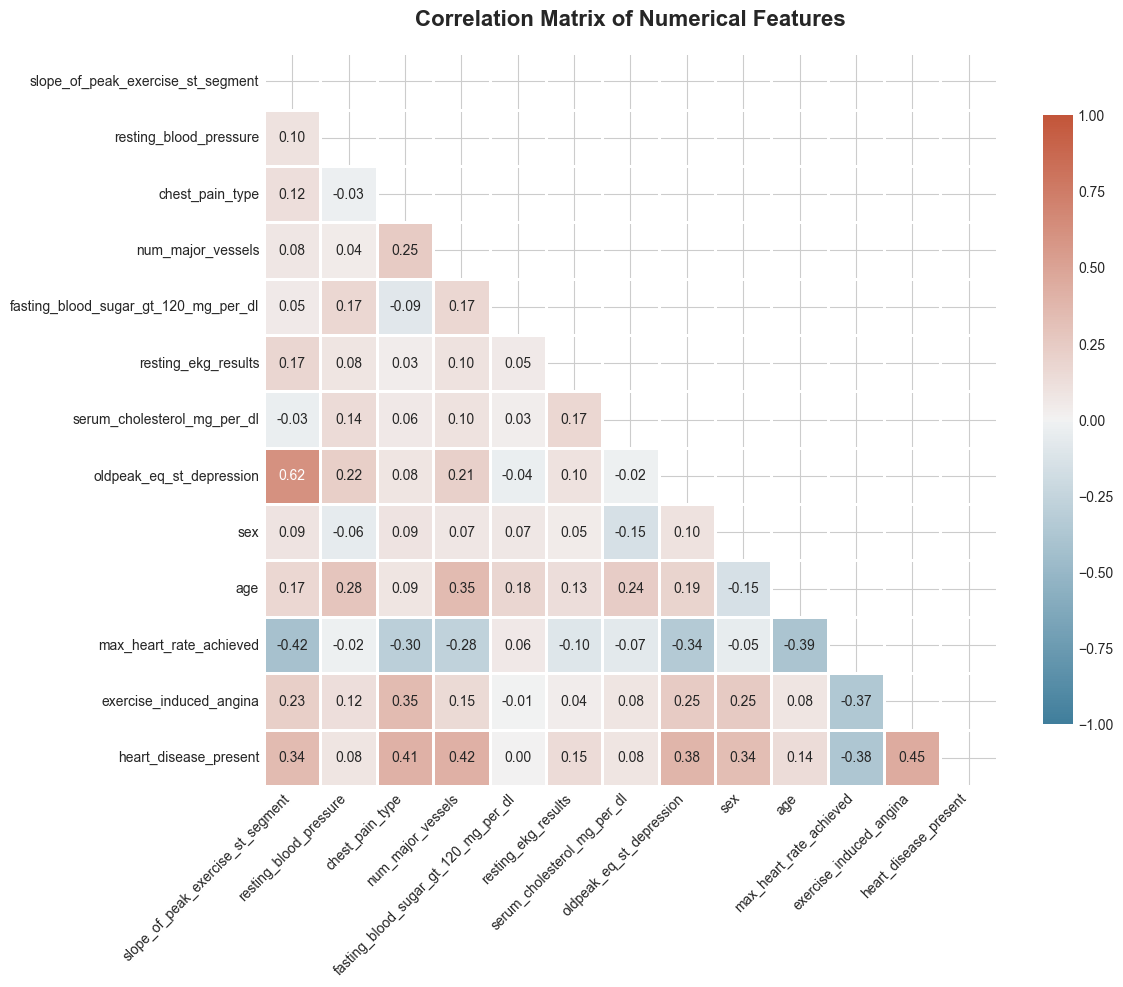


Top Positive Correlations with Heart Disease:
--------------------------------------------------
exercise_induced_angina        : +0.449
num_major_vessels              : +0.422
chest_pain_type                : +0.413
oldpeak_eq_st_depression       : +0.383
slope_of_peak_exercise_st_segment : +0.344

Top Negative Correlations with Heart Disease:
--------------------------------------------------
max_heart_rate_achieved        : -0.375
fasting_blood_sugar_gt_120_mg_per_dl : +0.003
resting_blood_pressure         : +0.079
serum_cholesterol_mg_per_dl    : +0.080
age                            : +0.138


In [14]:
# ============================================================================
# 5. CORRELATION HEATMAP FOR NUMERICAL FEATURES
# ============================================================================
print("\n" + "=" * 70)
print("CORRELATION ANALYSIS")
print("=" * 70)

# Select only numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'patient_id' in numerical_cols:
    numerical_cols.remove('patient_id')

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Plot heatmap
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=1, cbar_kws={"shrink": .8}, 
                annot=True, fmt=".2f", annot_kws={"size": 10})
    
    plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()
    
    # Highlight top correlations with target (if target is numerical)
    if 'heart_disease_present' in numerical_cols:
        target_corr = corr_matrix['heart_disease_present'].drop('heart_disease_present')
        top_pos = target_corr.nlargest(5)
        top_neg = target_corr.nsmallest(5)
        
        print("\nTop Positive Correlations with Heart Disease:")
        print("-" * 50)
        for feature, corr in top_pos.items():
            print(f"{feature:30} : {corr:+.3f}")
        
        print("\nTop Negative Correlations with Heart Disease:")
        print("-" * 50)
        for feature, corr in top_neg.items():
            print(f"{feature:30} : {corr:+.3f}")


NUMERICAL FEATURES VS TARGET VARIABLE ANALYSIS
Unique values in target column 'heart_disease_present': [0 1]
Data type of target column: int64

Statistical Summary by Target Class:
----------------------------------------------------------------------
                             Feature Class 0 Mean Class 1 Mean Mean Diff Class 0 Median Class 1 Median t-test p-value Effect Size (Cohen d)
   slope_of_peak_exercise_st_segment         1.36         1.79      0.43           1.00           2.00         0.0000                 0.730
              resting_blood_pressure       130.12       132.80      2.68         130.00         130.00         0.2948                 0.158
                     chest_pain_type         2.81         3.59      0.78           3.00           4.00         0.0000                 0.912
                   num_major_vessels         0.33         1.15      0.82           0.00           1.00         0.0000                 0.908
fasting_blood_sugar_gt_120_mg_per_dl         0.1

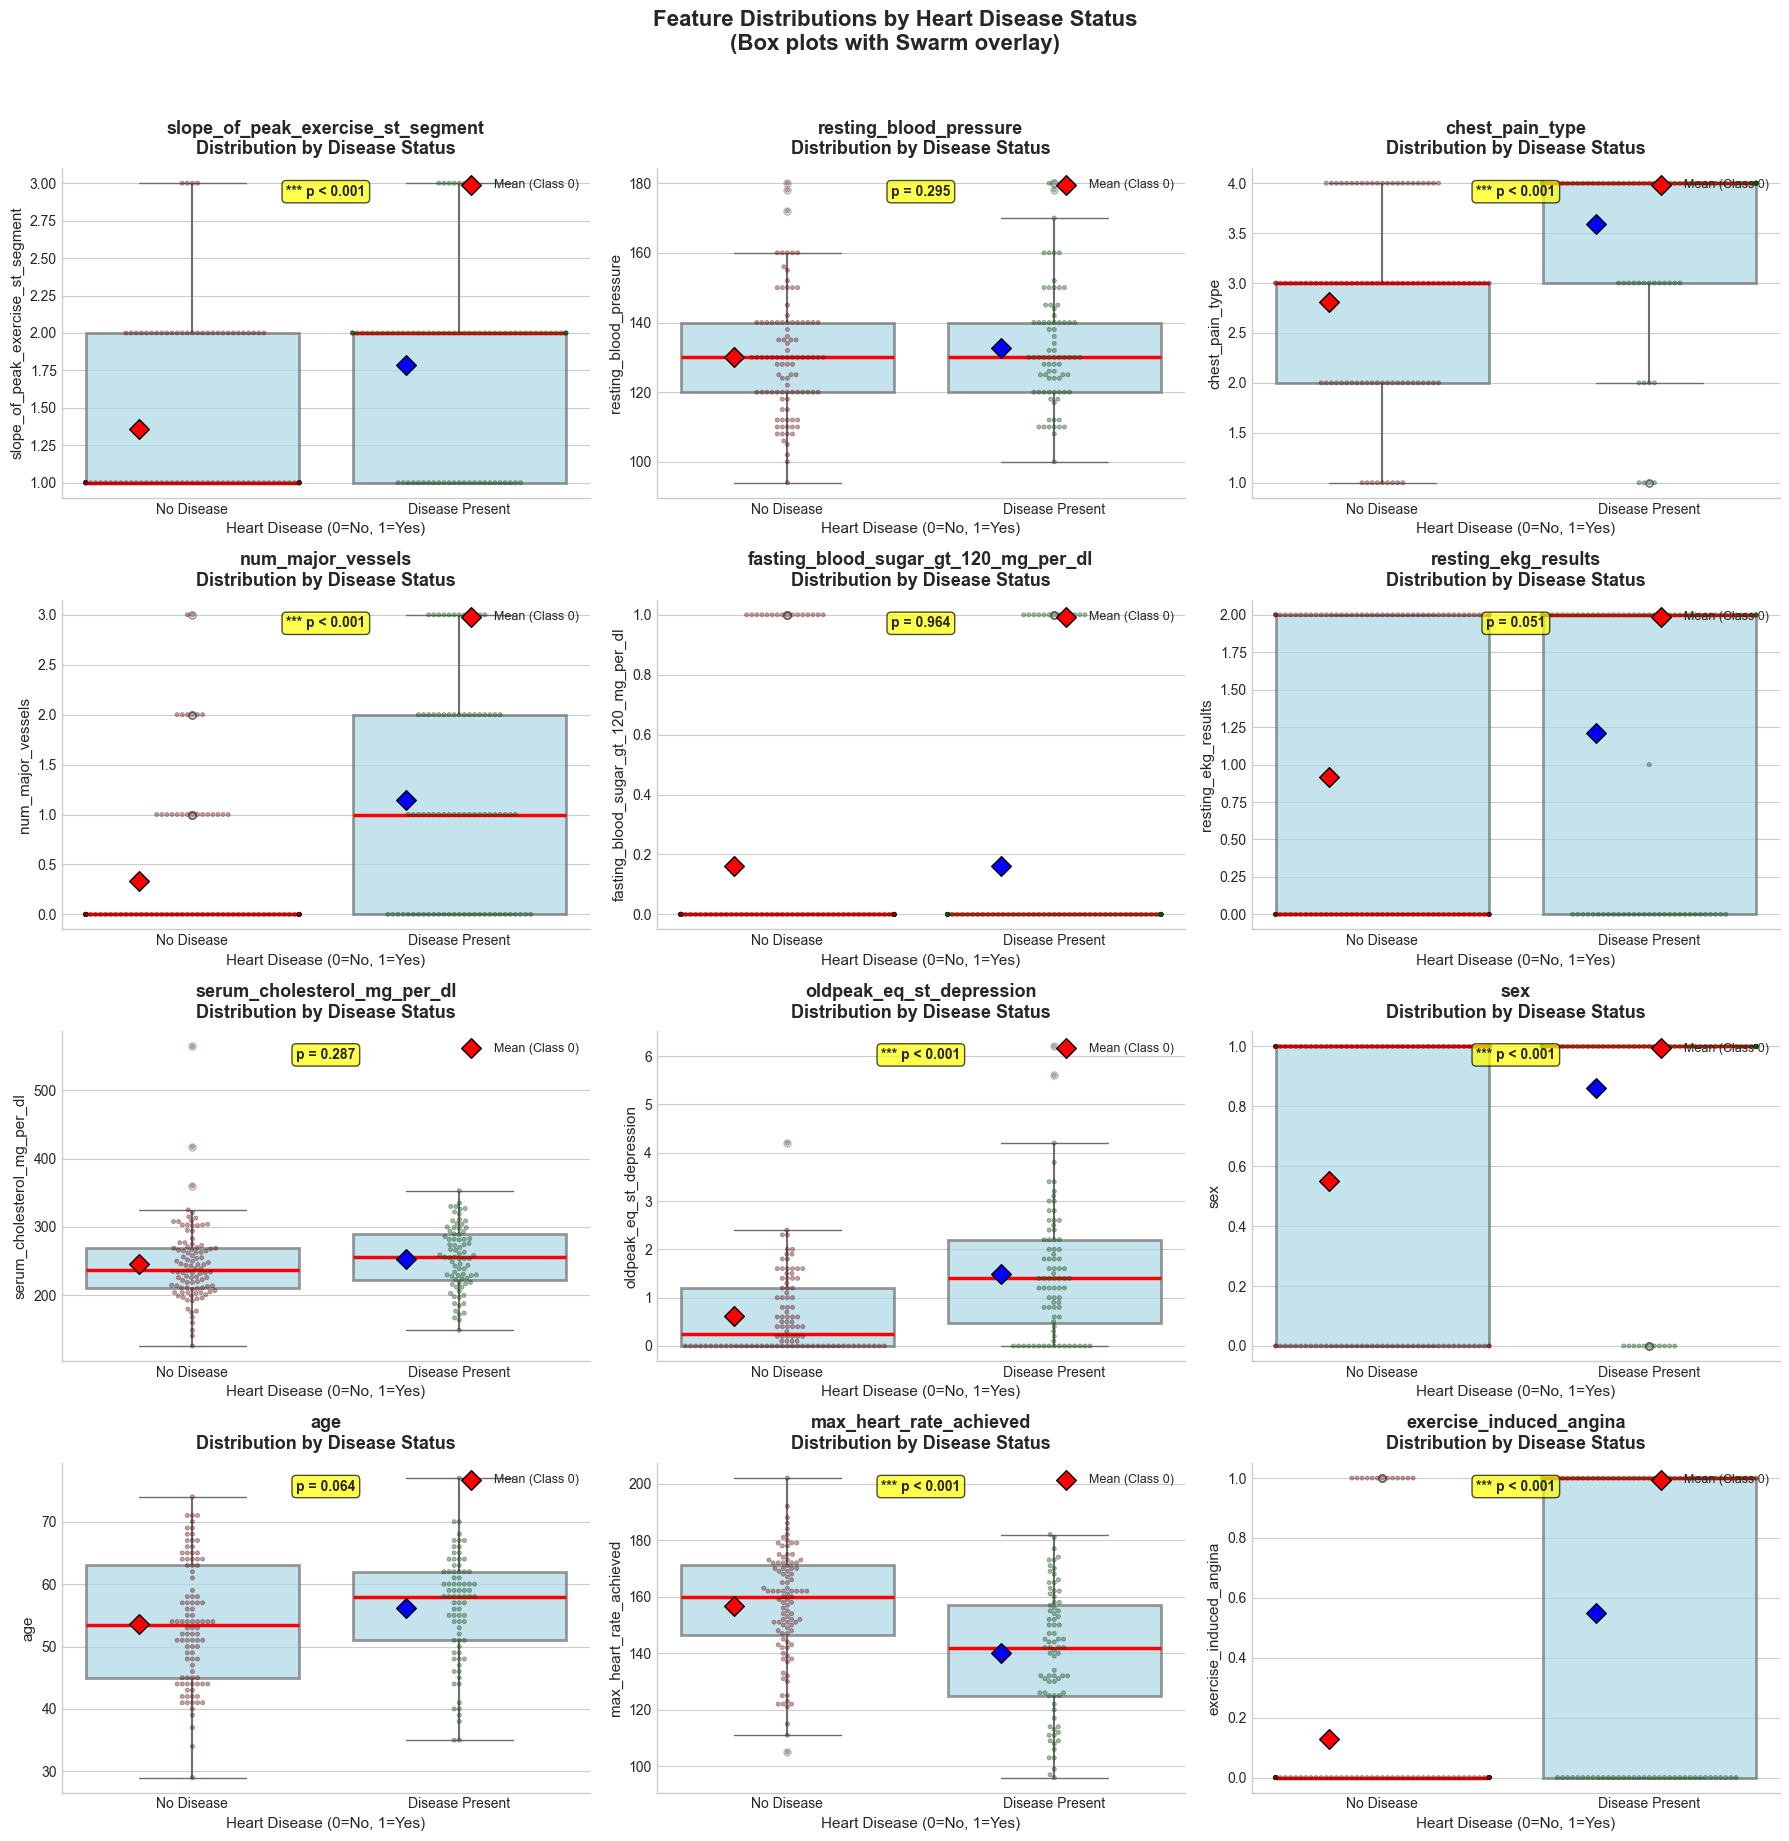


VIOLIN PLOTS: DENSITY DISTRIBUTION BY HEART DISEASE STATUS


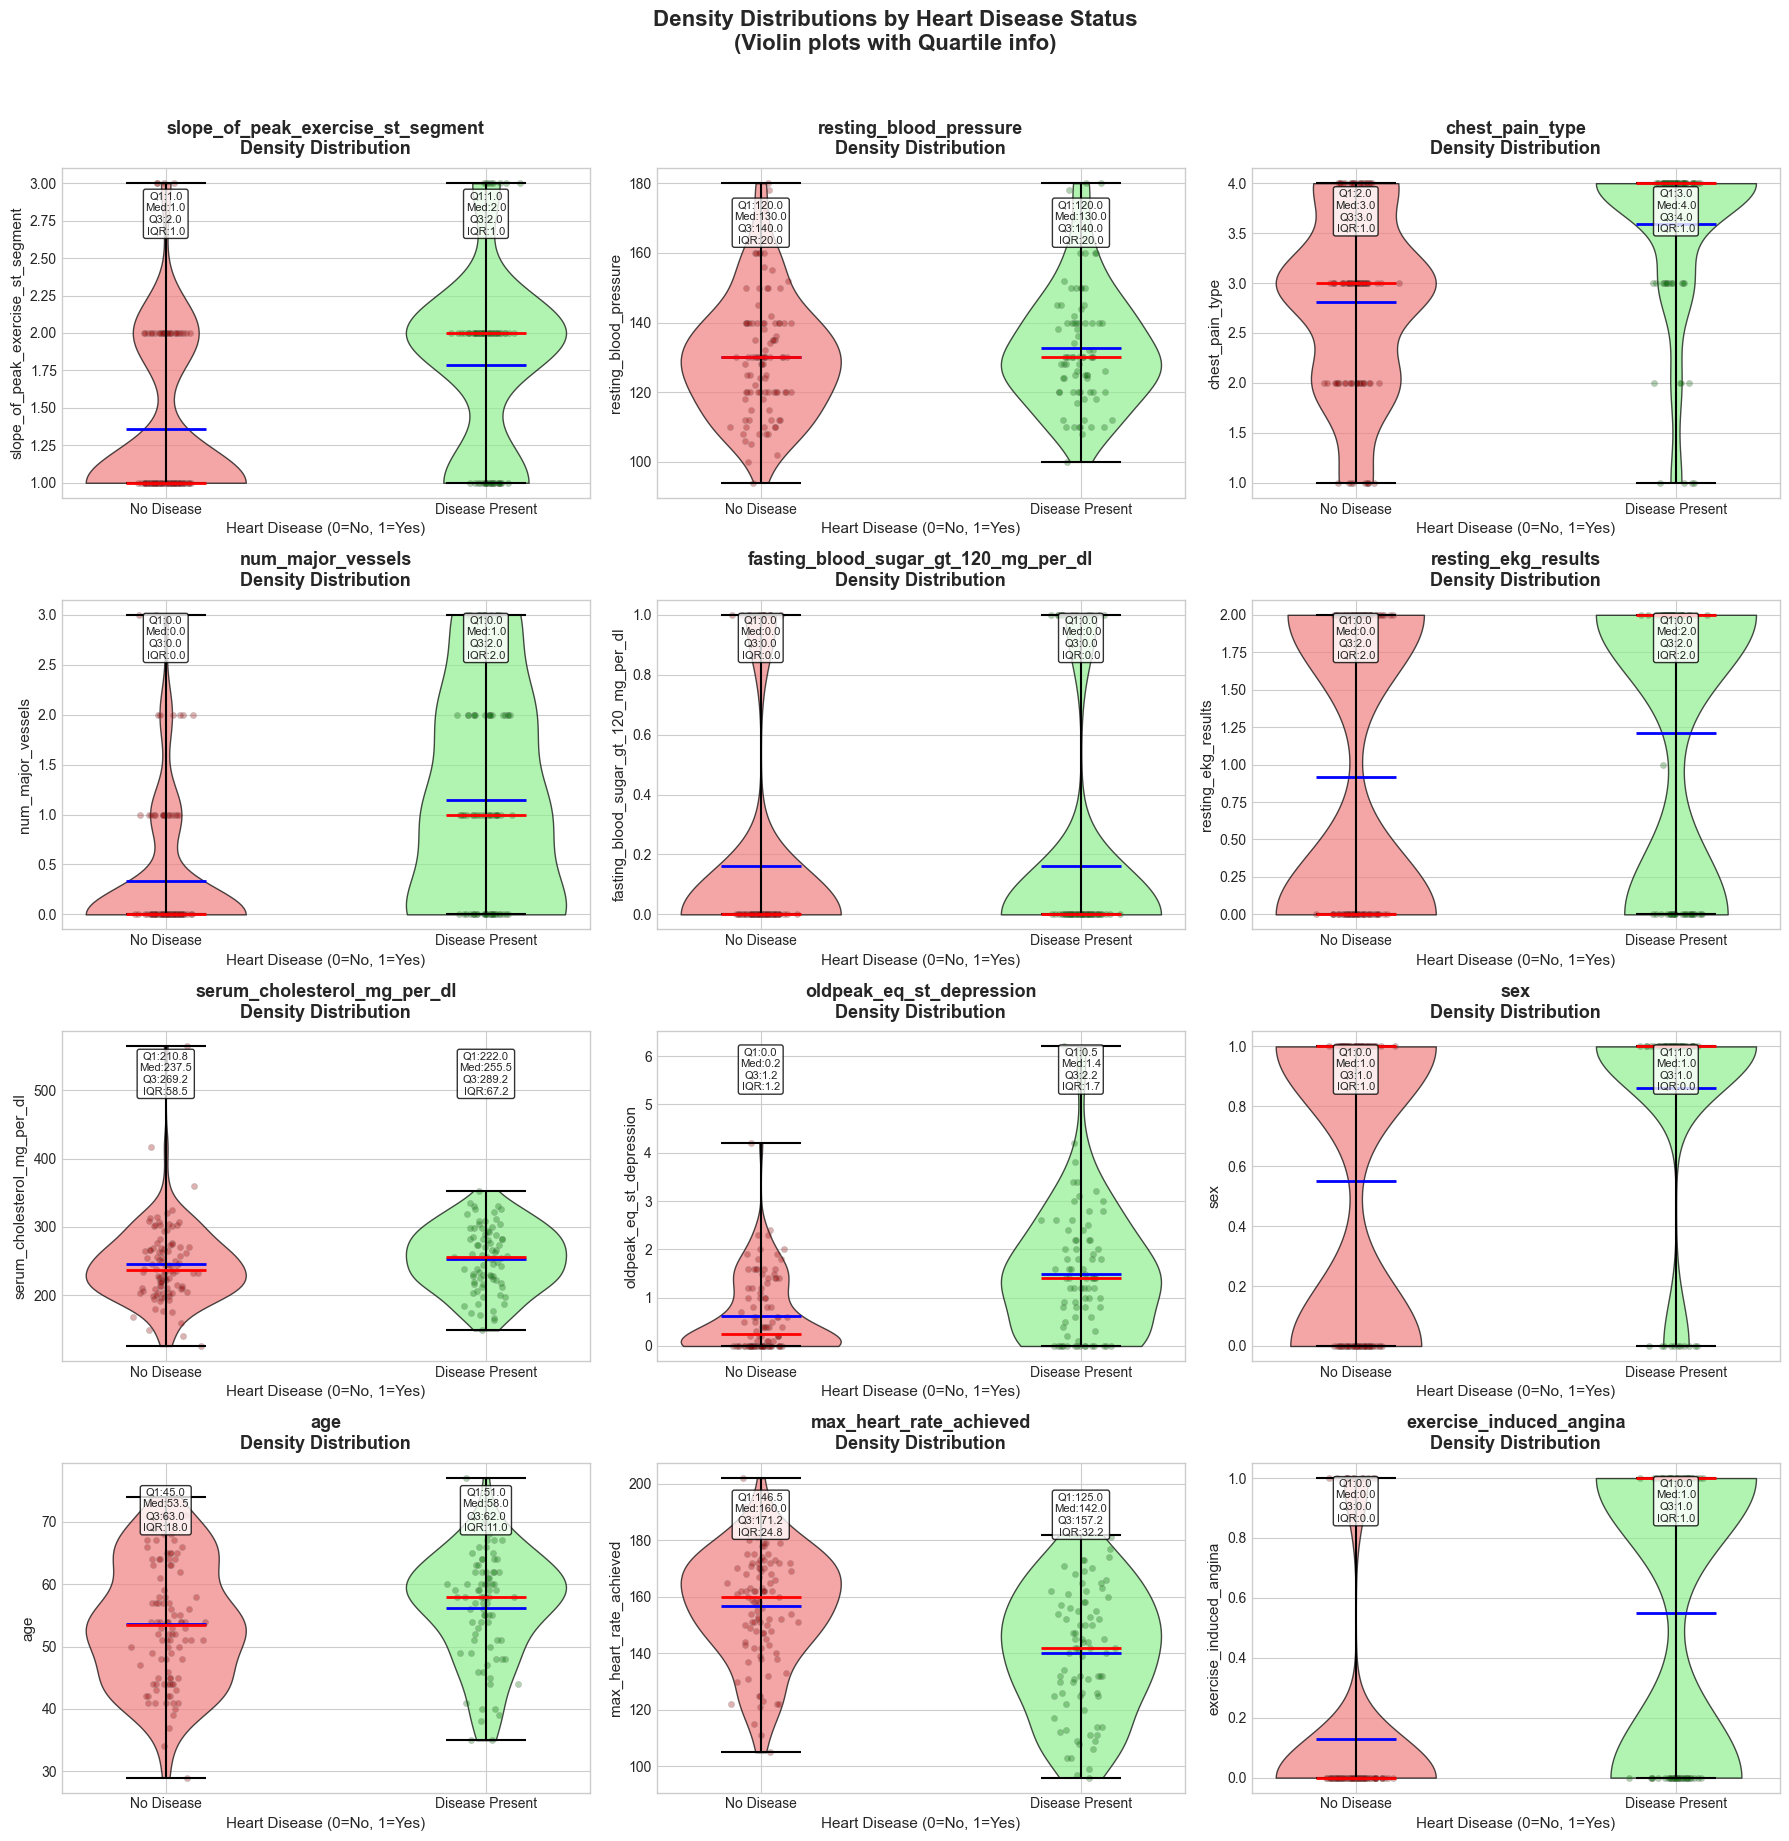


HISTOGRAMS: FEATURE DISTRIBUTION COMPARISON


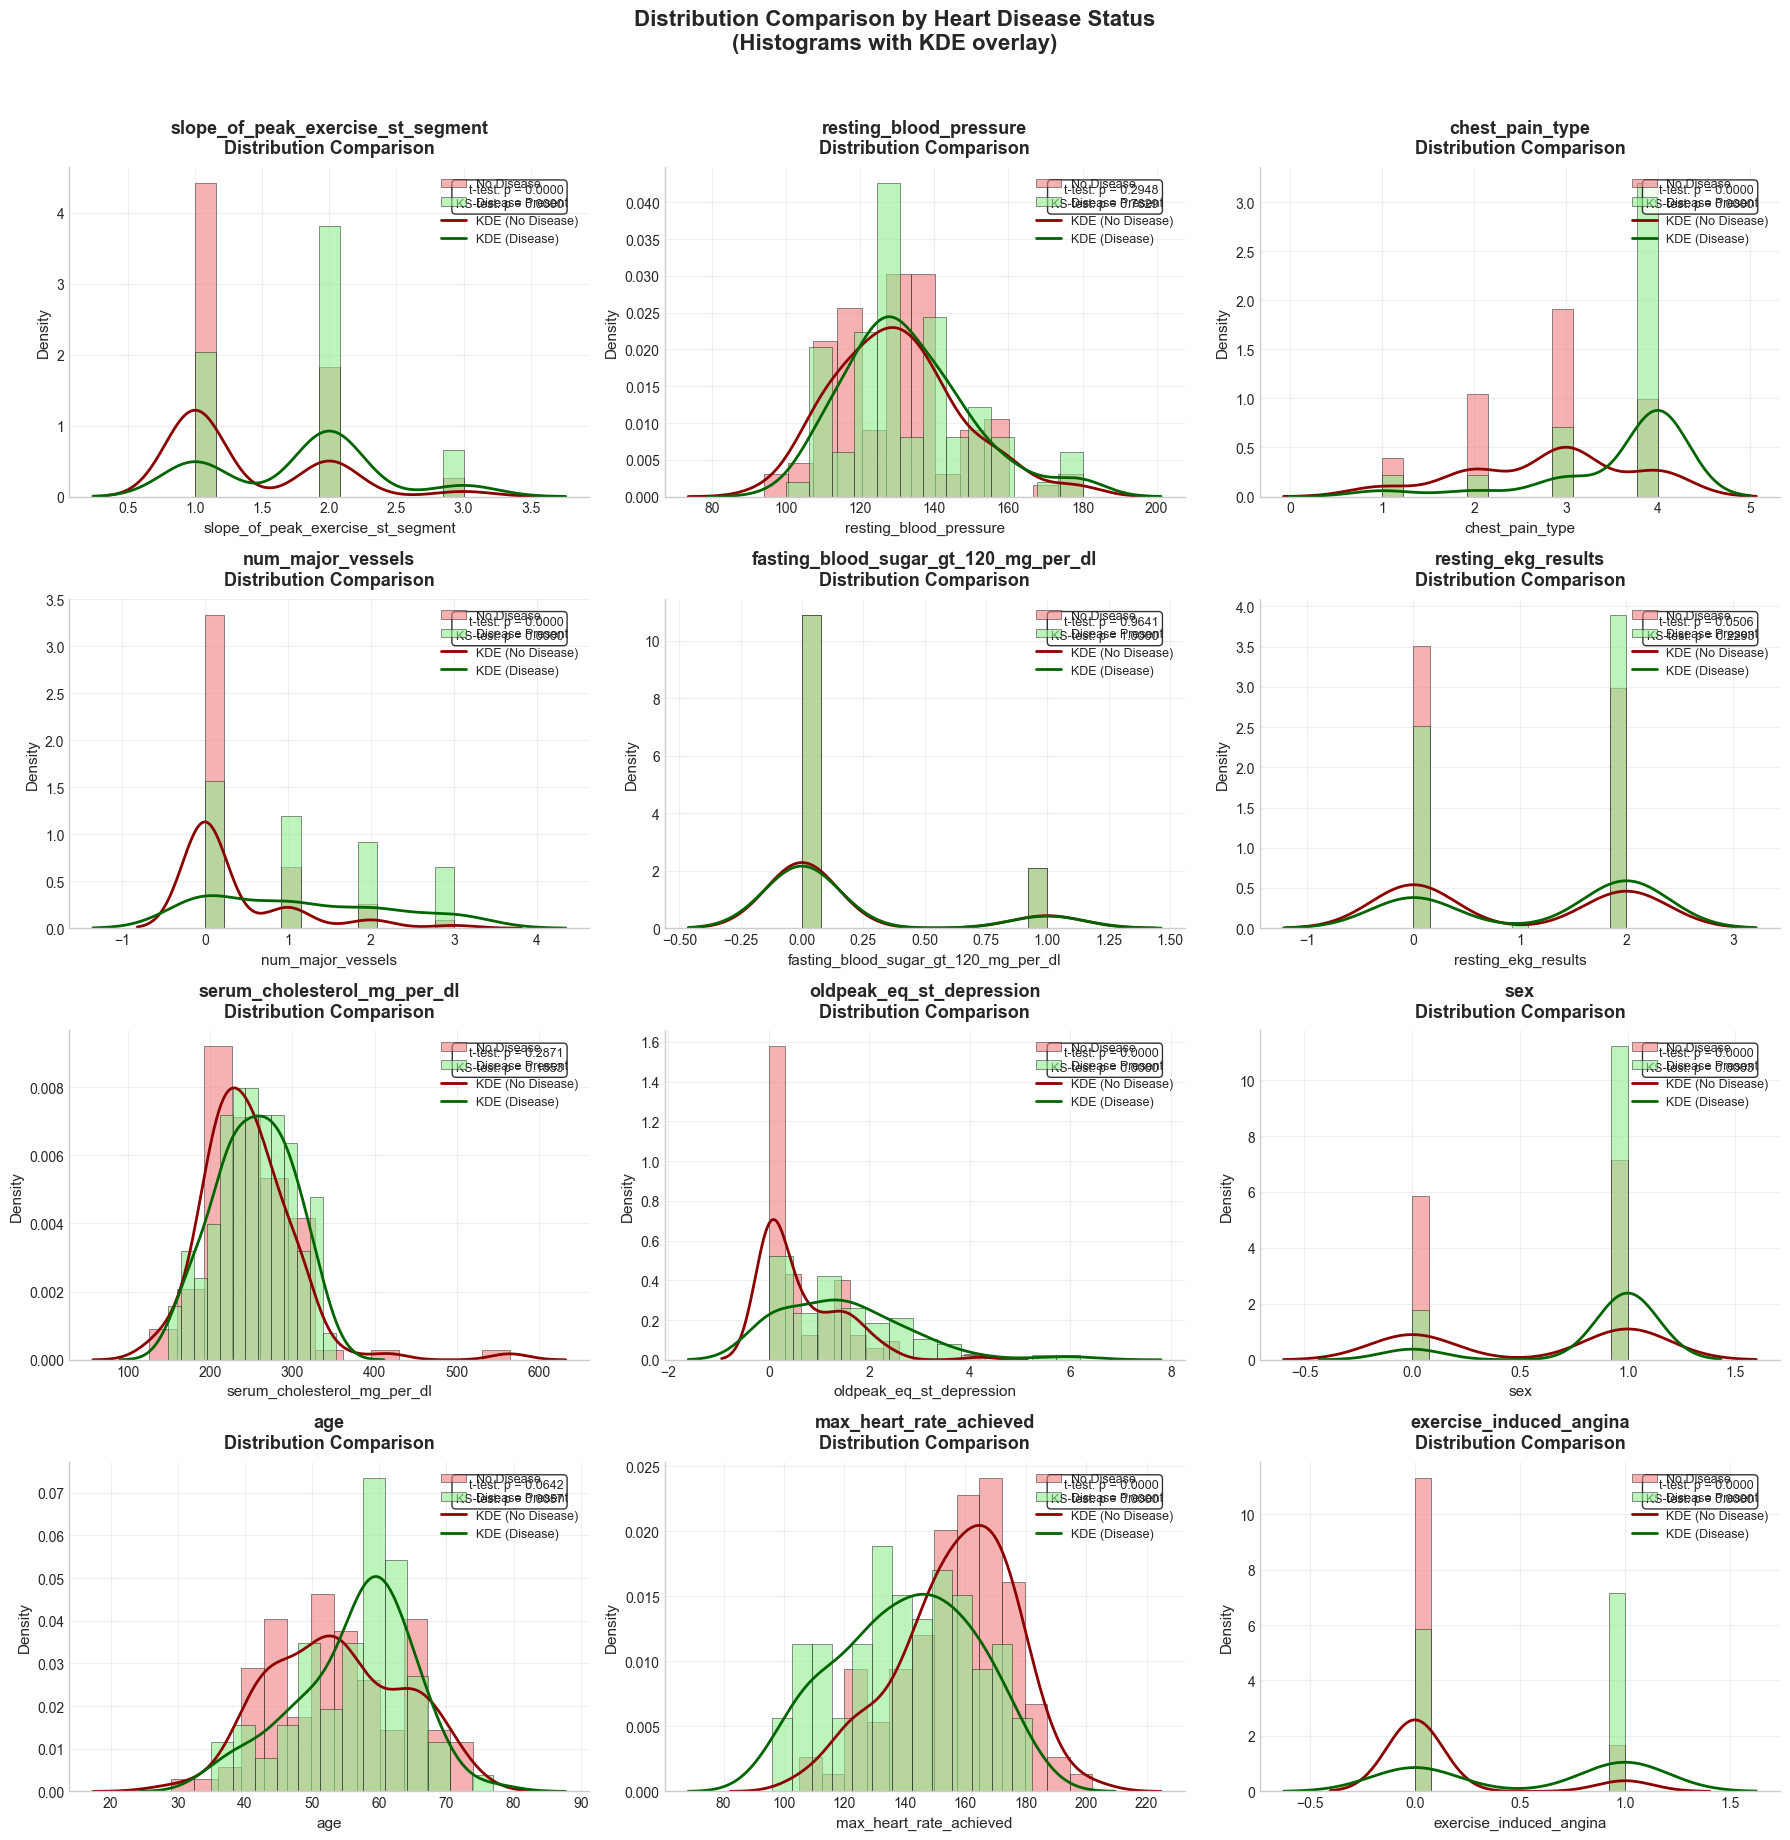


FEATURE IMPORTANCE: STANDARDIZED MEAN DIFFERENCES


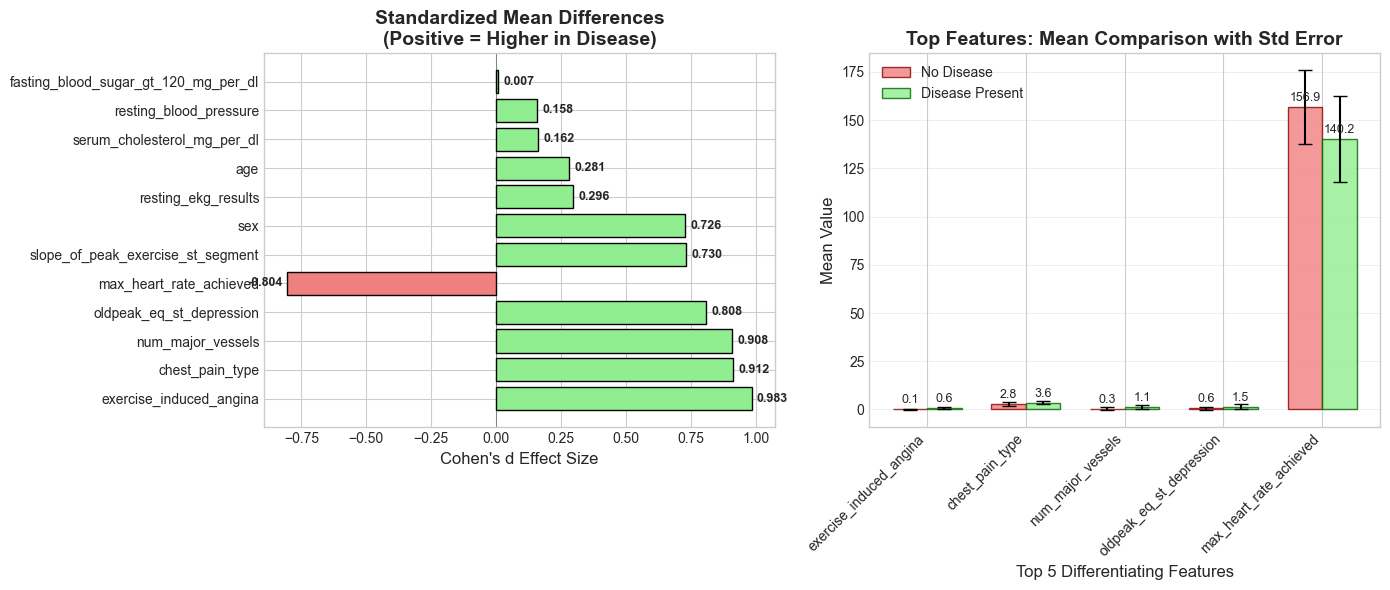


CORRELATION WITH TARGET VARIABLE


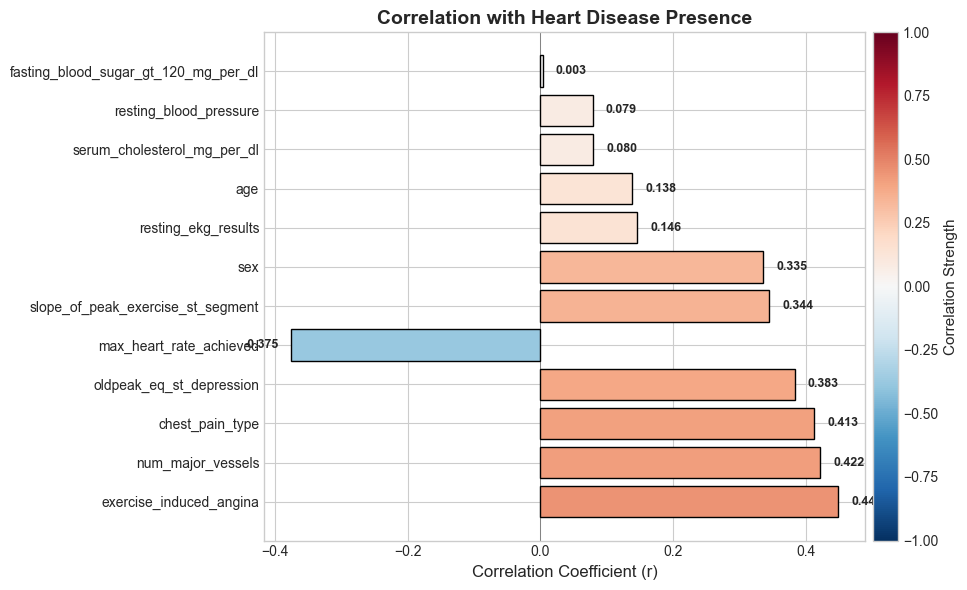


Correlation with Heart Disease (sorted by absolute value):
----------------------------------------------------------------------
                             Feature  Correlation Direction
             exercise_induced_angina     0.448647  Positive
                   num_major_vessels     0.421519  Positive
                     chest_pain_type     0.412829  Positive
            oldpeak_eq_st_depression     0.382930  Positive
             max_heart_rate_achieved    -0.375352  Negative
   slope_of_peak_exercise_st_segment     0.344224  Positive
                                 sex     0.335421  Positive
                 resting_ekg_results     0.145933  Positive
                                 age     0.138255  Positive
         serum_cholesterol_mg_per_dl     0.079775  Positive
              resting_blood_pressure     0.078506  Positive
fasting_blood_sugar_gt_120_mg_per_dl     0.003379  Positive


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

# Set style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Get numerical columns (exclude patient_id if present)
numeric_cols = [col for col in df.select_dtypes(include=["int", "float"]).columns.tolist() 
                if col != 'patient_id']
target = "heart_disease_present"

print("=" * 70)
print("NUMERICAL FEATURES VS TARGET VARIABLE ANALYSIS")
print("=" * 70)

# First, let's check the unique values in the target column
print(f"Unique values in target column '{target}': {df[target].unique()}")
print(f"Data type of target column: {df[target].dtype}")

# Convert target to string for consistent palette mapping
df_target_str = df.copy()
df_target_str[f'{target}_str'] = df_target_str[target].astype(str)

# Calculate basic statistics for each feature by target class
print("\nStatistical Summary by Target Class:")
print("-" * 70)

stats_summary = []
for col in numeric_cols:
    if col != target:
        group0 = df[df[target] == 0][col]
        group1 = df[df[target] == 1][col]
        
        # Calculate statistics
        stats_summary.append({
            'Feature': col,
            'Class 0 Mean': f"{group0.mean():.2f}",
            'Class 1 Mean': f"{group1.mean():.2f}",
            'Mean Diff': f"{(group1.mean() - group0.mean()):.2f}",
            'Class 0 Median': f"{group0.median():.2f}",
            'Class 1 Median': f"{group1.median():.2f}",
            't-test p-value': f"{stats.ttest_ind(group0, group1, nan_policy='omit').pvalue:.4f}",
            'Effect Size (Cohen d)': f"{(group1.mean() - group0.mean()) / np.sqrt((group0.std()**2 + group1.std()**2)/2):.3f}"
        })

# Display statistics table
stats_df = pd.DataFrame(stats_summary)
print(stats_df.to_string(index=False))

# ============================================================================
# 1. COMPREHENSIVE BOX PLOT GRID
# ============================================================================
print("\n\n" + "=" * 70)
print("BOX PLOTS: FEATURE DISTRIBUTION BY HEART DISEASE STATUS")
print("=" * 70)

# Create subplot grid (3 columns per row)
n_features = len([col for col in numeric_cols if col != target])
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4.5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    if col != target and idx < len(axes):
        ax = axes[idx]
        
        # Create enhanced box plot with explicit palette
        boxprops = dict(linewidth=2, facecolor='lightblue', alpha=0.7)
        medianprops = dict(linewidth=2.5, color='red')
        whiskerprops = dict(linewidth=1.5)
        
        # Create boxplot with explicit hue order
        sns.boxplot(x=f'{target}_str', y=col, data=df_target_str, ax=ax,
                   order=['0', '1'],  # Explicit order
                   palette={'0': 'lightcoral', '1': 'lightgreen'},  # Explicit palette
                   boxprops=boxprops, medianprops=medianprops,
                   whiskerprops=whiskerprops, showfliers=True,
                   flierprops=dict(marker='o', markersize=5, alpha=0.5))
        
        # Add swarm plot for actual data points
        sns.swarmplot(x=f'{target}_str', y=col, data=df_target_str, ax=ax, 
                     order=['0', '1'],  # Explicit order
                     palette={'0': 'darkred', '1': 'darkgreen'},  # Explicit palette
                     size=3, alpha=0.4, edgecolor='gray', linewidth=0.5)
        
        # Add mean markers
        for target_val, color in [('0', 'red'), ('1', 'blue')]:
            mean_val = df_target_str[df_target_str[f'{target}_str'] == target_val][col].mean()
            # Adjust x position based on string value
            x_pos = 0 if target_val == '0' else 1
            ax.scatter(x_pos - 0.2, mean_val, color=color, s=100, 
                      marker='D', edgecolor='black', linewidth=1, 
                      zorder=5, label=f'Mean (Class {target_val})' if target_val == '0' else None)
        
        # Formatting
        ax.set_title(f'{col}\nDistribution by Disease Status', fontsize=13, fontweight='bold', pad=10)
        ax.set_xlabel('Heart Disease (0=No, 1=Yes)', fontsize=11)
        ax.set_ylabel(col, fontsize=11)
        ax.set_xticklabels(['No Disease', 'Disease Present'], fontsize=10)
        ax.legend(loc='upper right', fontsize=9)
        
        # Add statistical annotation
        group0 = df[df[target] == 0][col]
        group1 = df[df[target] == 1][col]
        t_stat, p_val = stats.ttest_ind(group0, group1, nan_policy='omit')
        
        if p_val < 0.001:
            sig_text = '*** p < 0.001'
        elif p_val < 0.01:
            sig_text = '** p < 0.01'
        elif p_val < 0.05:
            sig_text = '* p < 0.05'
        else:
            sig_text = f'p = {p_val:.3f}'
        
        ax.text(0.5, 0.95, sig_text, transform=ax.transAxes,
               ha='center', va='top', fontsize=10, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
        
        # Remove top and right spines for cleaner look
        ax.spines[['top', 'right']].set_visible(False)

# Hide any unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Feature Distributions by Heart Disease Status\n(Box plots with Swarm overlay)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================================
# 2. VIOLIN PLOTS FOR DENSITY VISUALIZATION
# ============================================================================
print("\n" + "=" * 70)
print("VIOLIN PLOTS: DENSITY DISTRIBUTION BY HEART DISEASE STATUS")
print("=" * 70)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4.5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    if col != target and idx < len(axes):
        ax = axes[idx]
        
        # Create violin plot
        violin_parts = ax.violinplot([df[df[target] == 0][col], df[df[target] == 1][col]], 
                                     showmeans=True, showmedians=True, showextrema=True)
        
        # Customize violin plot colors
        for pc, color in zip(violin_parts['bodies'], ['lightcoral', 'lightgreen']):
            pc.set_facecolor(color)
            pc.set_alpha(0.7)
            pc.set_edgecolor('black')
        
        # Customize median, mean, and whiskers
        violin_parts['cmedians'].set_color('red')
        violin_parts['cmedians'].set_linewidth(2)
        violin_parts['cmeans'].set_color('blue')
        violin_parts['cmeans'].set_linewidth(2)
        violin_parts['cmins'].set_color('black')
        violin_parts['cmaxes'].set_color('black')
        violin_parts['cbars'].set_color('black')
        
        # Add individual data points (jittered)
        for target_idx, (target_val, color) in enumerate([(0, 'darkred'), (1, 'darkgreen')]):
            y_data = df[df[target] == target_val][col]
            x_data = np.random.normal(target_idx + 1, 0.04, size=len(y_data))  # Jitter
            ax.scatter(x_data, y_data, alpha=0.3, color=color, s=20, edgecolor='gray', linewidth=0.5)
        
        # Formatting
        ax.set_title(f'{col}\nDensity Distribution', fontsize=13, fontweight='bold', pad=10)
        ax.set_xlabel('Heart Disease (0=No, 1=Yes)', fontsize=11)
        ax.set_ylabel(col, fontsize=11)
        ax.set_xticks([1, 2])
        ax.set_xticklabels(['No Disease', 'Disease Present'], fontsize=10)
        
        # Add quartile information
        for i, target_val in enumerate([0, 1], 1):
            data = df[df[target] == target_val][col]
            Q1, median, Q3 = data.quantile([0.25, 0.5, 0.75])
            iqr = Q3 - Q1
            
            ax.text(i, ax.get_ylim()[1] * 0.95, 
                   f'Q1:{Q1:.1f}\nMed:{median:.1f}\nQ3:{Q3:.1f}\nIQR:{iqr:.1f}',
                   ha='center', va='top', fontsize=8,
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Density Distributions by Heart Disease Status\n(Violin plots with Quartile info)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================================
# 3. SIDE-BY-SIDE HISTOGRAMS WITH KDE
# ============================================================================
print("\n" + "=" * 70)
print("HISTOGRAMS: FEATURE DISTRIBUTION COMPARISON")
print("=" * 70)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4.5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    if col != target and idx < len(axes):
        ax = axes[idx]
        
        # Create histograms for each class
        bins = min(30, int(np.sqrt(len(df[col].dropna()))))
        
        # Plot histogram for class 0
        class0_data = df[df[target] == 0][col]
        ax.hist(class0_data, bins=bins, alpha=0.6, color='lightcoral', 
               density=True, label='No Disease', edgecolor='black', linewidth=0.5)
        
        # Plot histogram for class 1
        class1_data = df[df[target] == 1][col]
        ax.hist(class1_data, bins=bins, alpha=0.6, color='lightgreen', 
               density=True, label='Disease Present', edgecolor='black', linewidth=0.5)
        
        # Add KDE curves
        sns.kdeplot(data=class0_data, ax=ax, color='darkred', linewidth=2, label='KDE (No Disease)')
        sns.kdeplot(data=class1_data, ax=ax, color='darkgreen', linewidth=2, label='KDE (Disease)')
        
        # Calculate and display statistical test
        t_stat, p_val = stats.ttest_ind(class0_data, class1_data, nan_policy='omit')
        ks_stat, ks_pval = stats.ks_2samp(class0_data, class1_data)
        
        # Add statistical annotation
        stats_text = f't-test: p = {p_val:.4f}\nKS-test: p = {ks_pval:.4f}'
        ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
               ha='right', va='top', fontsize=9,
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
        
        # Formatting
        ax.set_title(f'{col}\nDistribution Comparison', fontsize=13, fontweight='bold', pad=10)
        ax.set_xlabel(col, fontsize=11)
        ax.set_ylabel('Density', fontsize=11)
        ax.legend(loc='upper right', fontsize=9)
        ax.grid(True, alpha=0.3)
        
        # Remove top and right spines
        ax.spines[['top', 'right']].set_visible(False)

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Distribution Comparison by Heart Disease Status\n(Histograms with KDE overlay)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================================
# 4. FEATURE IMPORTANCE: STANDARDIZED MEAN DIFFERENCES
# ============================================================================
print("\n" + "=" * 70)
print("FEATURE IMPORTANCE: STANDARDIZED MEAN DIFFERENCES")
print("=" * 70)

# Calculate standardized mean differences (Cohen's d)
feature_importance = []
for col in numeric_cols:
    if col != target:
        group0 = df[df[target] == 0][col]
        group1 = df[df[target] == 1][col]
        
        # Cohen's d effect size
        mean_diff = group1.mean() - group0.mean()
        pooled_std = np.sqrt((group0.std()**2 + group1.std()**2) / 2)
        cohens_d = mean_diff / pooled_std if pooled_std != 0 else 0
        
        feature_importance.append({
            'Feature': col,
            'Cohen_d': cohens_d,
            'Absolute_d': abs(cohens_d),
            'Direction': 'Positive' if cohens_d > 0 else 'Negative'
        })

# Create DataFrame and sort by absolute effect size
importance_df = pd.DataFrame(feature_importance)
importance_df = importance_df.sort_values('Absolute_d', ascending=False)

# Create bar plot for effect sizes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Effect sizes (Cohen's d) with colors by direction
colors = ['lightgreen' if d > 0 else 'lightcoral' for d in importance_df['Cohen_d']]
bars = ax1.barh(range(len(importance_df)), importance_df['Cohen_d'], color=colors, edgecolor='black')
ax1.set_yticks(range(len(importance_df)))
ax1.set_yticklabels(importance_df['Feature'], fontsize=10)
ax1.set_xlabel("Cohen's d Effect Size", fontsize=12)
ax1.set_title('Standardized Mean Differences\n(Positive = Higher in Disease)', fontsize=14, fontweight='bold')

# Add value labels
for i, (bar, d) in enumerate(zip(bars, importance_df['Cohen_d'])):
    ax1.text(bar.get_width() + (0.02 if d >= 0 else -0.02), bar.get_y() + bar.get_height()/2,
            f'{d:.3f}', va='center', ha='left' if d >= 0 else 'right',
            fontweight='bold', fontsize=9)

# Add vertical line at 0
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)

# Plot 2: Top 5 most important features detailed comparison
top_features = importance_df.head(5)
x = np.arange(len(top_features))
width = 0.35

means_0 = [df[df[target] == 0][feat].mean() for feat in top_features['Feature']]
means_1 = [df[df[target] == 1][feat].mean() for feat in top_features['Feature']]
stds_0 = [df[df[target] == 0][feat].std() for feat in top_features['Feature']]
stds_1 = [df[df[target] == 1][feat].std() for feat in top_features['Feature']]

bars1 = ax2.bar(x - width/2, means_0, width, label='No Disease', 
                color='lightcoral', edgecolor='darkred', alpha=0.8, yerr=stds_0, capsize=5)
bars2 = ax2.bar(x + width/2, means_1, width, label='Disease Present', 
                color='lightgreen', edgecolor='darkgreen', alpha=0.8, yerr=stds_1, capsize=5)

ax2.set_xlabel('Top 5 Differentiating Features', fontsize=12)
ax2.set_ylabel('Mean Value', fontsize=12)
ax2.set_title('Top Features: Mean Comparison with Std Error', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(top_features['Feature'], rotation=45, ha='right', fontsize=10)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + max(means_0 + means_1)*0.01,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================================
# 5. HEATMAP OF CORRELATIONS WITH TARGET
# ============================================================================
print("\n" + "=" * 70)
print("CORRELATION WITH TARGET VARIABLE")
print("=" * 70)

# Calculate correlations with target
correlations = []
for col in numeric_cols:
    if col != target:
        corr = df[[col, target]].corr().iloc[0, 1]
        correlations.append({
            'Feature': col,
            'Correlation': corr,
            'Absolute_Corr': abs(corr),
            'Direction': 'Positive' if corr > 0 else 'Negative'
        })

corr_df = pd.DataFrame(correlations).sort_values('Absolute_Corr', ascending=False)

# Create heatmap style bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create gradient colors based on correlation strength
colors = plt.cm.RdBu_r((corr_df['Correlation'] + 1) / 2)  # Normalize to [0,1]

bars = ax.barh(range(len(corr_df)), corr_df['Correlation'], color=colors, edgecolor='black')
ax.set_yticks(range(len(corr_df)))
ax.set_yticklabels(corr_df['Feature'], fontsize=10)
ax.set_xlabel('Correlation Coefficient (r)', fontsize=12)
ax.set_title('Correlation with Heart Disease Presence', fontsize=14, fontweight='bold')

# Add correlation value labels
for i, (bar, corr) in enumerate(zip(bars, corr_df['Correlation'])):
    ax.text(bar.get_width() + (0.02 if corr >= 0 else -0.02), bar.get_y() + bar.get_height()/2,
            f'{corr:.3f}', va='center', ha='left' if corr >= 0 else 'right',
            fontweight='bold', fontsize=9)

# Add vertical line at 0
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)

# Add colorbar for reference
sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Correlation Strength', fontsize=11)

plt.tight_layout()
plt.show()

# Display correlation table
print("\nCorrelation with Heart Disease (sorted by absolute value):")
print("-" * 70)
print(corr_df[['Feature', 'Correlation', 'Direction']].to_string(index=False))

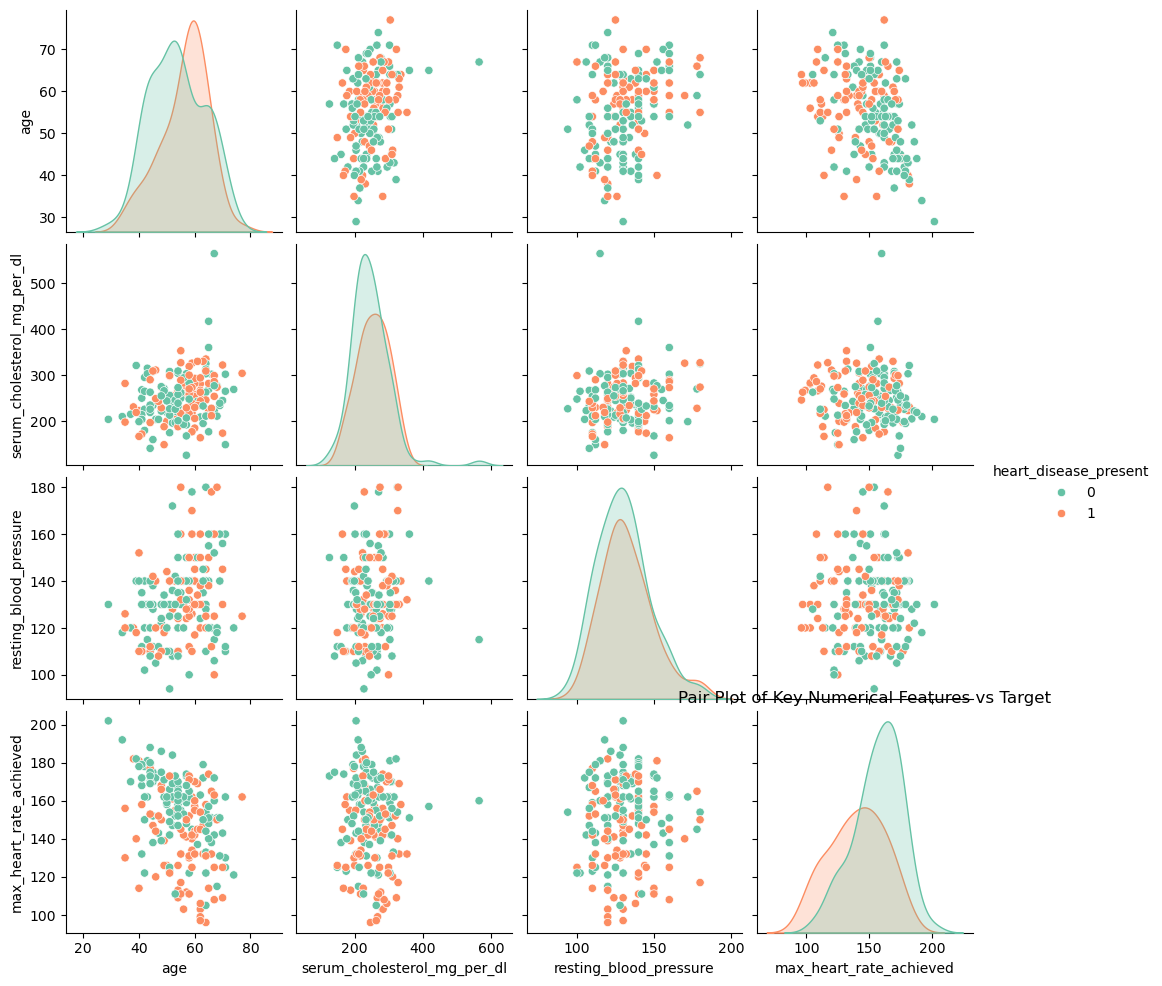

In [ ]:
key_features = ["age", "serum_cholesterol_mg_per_dl", "resting_blood_pressure", "max_heart_rate_achieved"] 
target = "heart_disease_present"

sns.pairplot(df[key_features + [target]], hue=target, diag_kind='kde', palette='Set2')
plt.title("Pair Plot of Key Numerical Features vs Target")
plt.show()

OUTLIER DETECTION ANALYSIS
Analyzing 13 numerical features for outliers...


DETAILED OUTLIER STATISTICS
                             Feature Data Type     Q1     Q3   IQR Lower Bound Upper Bound  Outlier Count Outlier % Min Value Max Value Example Outliers
fasting_blood_sugar_gt_120_mg_per_dl     int64   0.00   0.00  0.00        0.00        0.00             29     16.1%      0.00      1.00              [1]
                   num_major_vessels     int64   0.00   1.00  1.00       -1.50        2.50             14      7.8%      0.00      3.00              [3]
                     chest_pain_type     int64   3.00   4.00  1.00        1.50        5.50             13      7.2%      1.00      4.00              [1]
              resting_blood_pressure     int64 120.00 140.00 20.00       90.00      170.00              6      3.3%     94.00    180.00  [178, 180, 172]
            oldpeak_eq_st_depression   float64   0.00   1.60  1.60       -2.40        4.00              4      2.2%      0.00     

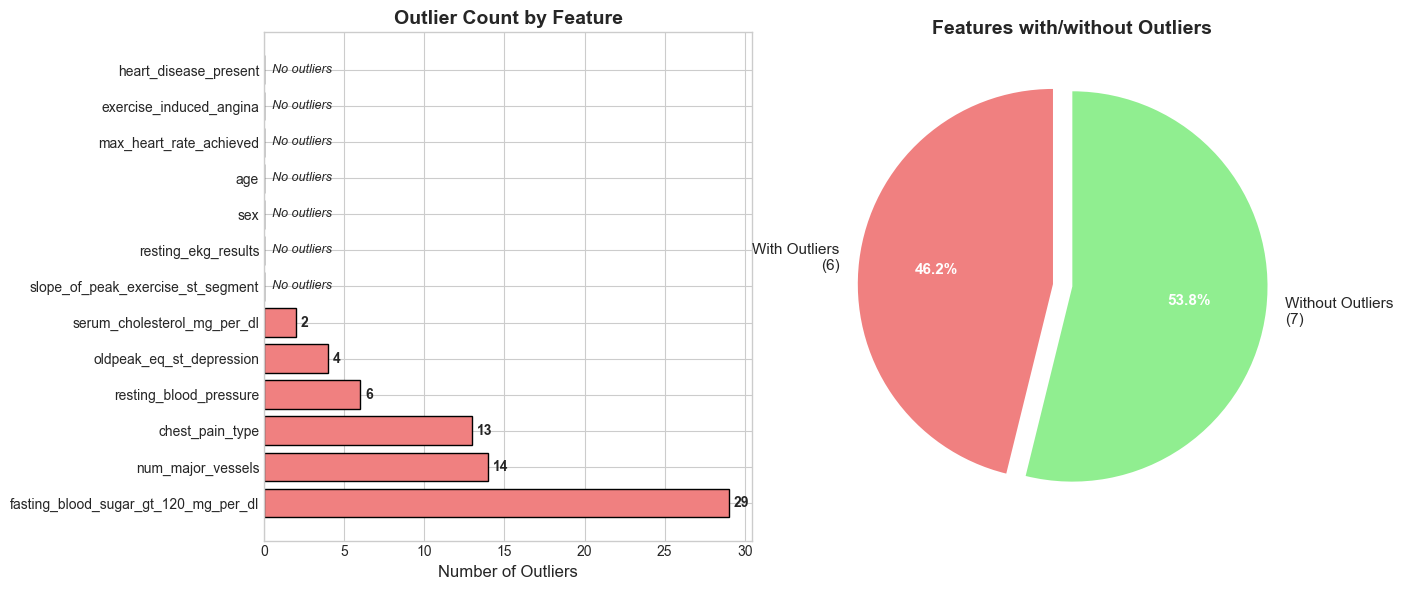


CONCISE OUTLIER SUMMARY
 Feature Outlier Count Outlier % Min Value Max Value Example Outliers
4 fasting_blood_sugar_gt_120_mg_per_dl 29 16.1% 0.00 1.00 [1]
3 num_major_vessels 14 7.8% 0.00 3.00 [3]
2 chest_pain_type 13 7.2% 1.00 4.00 [1]
1 resting_blood_pressure 6 3.3% 94.00 180.00 [178, 180, 172]
7 oldpeak_eq_st_depression 4 2.2% 0.00 6.20 [4.2, 5.6, 6.2]
6 serum_cholesterol_mg_per_dl 2 1.1% 126.00 564.00 [417, 564]
0 slope_of_peak_exercise_st_segment 0 0.0% 1.00 3.00 None
5 resting_ekg_results 0 0.0% 0.00 2.00 None
8 sex 0 0.0% 0.00 1.00 None
9 age 0 0.0% 29.00 77.00 None
10 max_heart_rate_achieved 0 0.0% 96.00 202.00 None
11 exercise_induced_angina 0 0.0% 0.00 1.00 None
12 heart_disease_present 0 0.0% 0.00 1.00 None



KEY INSIGHTS AND RECOMMENDATIONS

Summary Statistics:
- Total outliers detected across all features: 68
- Features with outliers: 6 out of 13
- Feature with most outliers: 'fasting_blood_sugar_gt_120_mg_per_dl' (29 outliers, 7.8%)
- Features with >5 outliers: fasting

In [18]:
# Get numerical columns
numeric_cols = [col for col in df.select_dtypes(include=["int", "float"]).columns.tolist() 
                if col != 'patient_id']

print("=" * 70)
print("OUTLIER DETECTION ANALYSIS")
print("=" * 70)
print(f"Analyzing {len(numeric_cols)} numerical features for outliers...\n")

# Create a list to store outlier statistics
outlier_stats = []

for col in numeric_cols:
    # Calculate quartiles and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outlier_mask.sum()
    outlier_percentage = (outlier_count / len(df)) * 100
    
    # Get actual outlier values (first few for reference)
    outlier_values = df.loc[outlier_mask, col].unique()[:3]  # First 3 unique values
    
    # Store statistics
    outlier_stats.append({
        'Feature': col,
        'Data Type': str(df[col].dtype),
        'Q1': f"{Q1:.2f}",
        'Q3': f"{Q3:.2f}",
        'IQR': f"{IQR:.2f}",
        'Lower Bound': f"{lower_bound:.2f}",
        'Upper Bound': f"{upper_bound:.2f}",
        'Outlier Count': outlier_count,
        'Outlier %': f"{outlier_percentage:.1f}%",
        'Min Value': f"{df[col].min():.2f}",
        'Max Value': f"{df[col].max():.2f}",
        'Example Outliers': str(list(outlier_values)) if len(outlier_values) > 0 else "None"
    })

# Convert to DataFrame
outliers_df = pd.DataFrame(outlier_stats)

# Sort by outlier percentage (descending)
outliers_df = outliers_df.sort_values('Outlier Count', ascending=False)

# ============================================================================
# 1. DISPLAY DETAILED TABLE
# ============================================================================
print("\n" + "=" * 70)
print("DETAILED OUTLIER STATISTICS")
print("=" * 70)

# Display the full table
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 30)

print(outliers_df.to_string(index=False))

# ============================================================================
# 2. CREATE SUMMARY VISUALIZATION
# ============================================================================
print("\n\n" + "=" * 70)
print("OUTLIER SUMMARY VISUALIZATION")
print("=" * 70)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Bar chart of outlier counts
features = outliers_df['Feature']
outlier_counts = outliers_df['Outlier Count']
colors = ['lightcoral' if count > 0 else 'lightgreen' for count in outlier_counts]

bars = ax1.barh(range(len(features)), outlier_counts, color=colors, edgecolor='black')
ax1.set_yticks(range(len(features)))
ax1.set_yticklabels(features, fontsize=10)
ax1.set_xlabel('Number of Outliers', fontsize=12)
ax1.set_title('Outlier Count by Feature', fontsize=14, fontweight='bold')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    if width > 0:
        ax1.text(width + max(outlier_counts)*0.01, bar.get_y() + bar.get_height()/2,
                f'{int(width)}', va='center', ha='left', fontweight='bold')
    else:
        ax1.text(0.5, bar.get_y() + bar.get_height()/2,
                'No outliers', va='center', ha='left', fontsize=9, style='italic')

# Add a vertical line at 0 for reference
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

# Plot 2: Pie chart showing features with vs without outliers
features_with_outliers = (outliers_df['Outlier Count'] > 0).sum()
features_without_outliers = len(outliers_df) - features_with_outliers

labels = [f'With Outliers\n({features_with_outliers})', 
          f'Without Outliers\n({features_without_outliers})']
sizes = [features_with_outliers, features_without_outliers]
colors_pie = ['lightcoral', 'lightgreen']
explode = (0.1, 0)  # Explode the first slice

wedges, texts, autotexts = ax2.pie(sizes, explode=explode, labels=labels, colors=colors_pie,
                                   autopct='%1.1f%%', startangle=90, textprops={'fontsize': 11})
ax2.set_title('Features with/without Outliers', fontsize=14, fontweight='bold')

# Make autopct text bold and white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# ============================================================================
# 3. CREATE A CONCISE SUMMARY TABLE
# ============================================================================
print("\n" + "=" * 70)
print("CONCISE OUTLIER SUMMARY")
print("=" * 70)

# Create a more concise summary table
summary_df = outliers_df[['Feature', 'Outlier Count', 'Outlier %', 
                         'Min Value', 'Max Value', 'Example Outliers']].copy()

# Highlight features with outliers
def highlight_outliers(row):
    if row['Outlier Count'] > 0:
        return ['background-color: #ffcccc' for _ in row]
    else:
        return ['background-color: #ccffcc' for _ in row]

# Apply styling
styled_df = summary_df.style.apply(highlight_outliers, axis=1)

# Display the styled dataframe
print(styled_df.to_string())  # For console display

# For Jupyter notebook, you would use:
# display(styled_df)

# ============================================================================
# 4. KEY INSIGHTS AND RECOMMENDATIONS
# ============================================================================
print("\n\n" + "=" * 70)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("=" * 70)

# Calculate summary statistics
total_outliers = outliers_df['Outlier Count'].sum()
max_outliers_feature = outliers_df.loc[outliers_df['Outlier Count'].idxmax(), 'Feature']
max_outliers_count = outliers_df['Outlier Count'].max()
max_outliers_pct = outliers_df['Outlier %'].max()

features_with_many_outliers = outliers_df[outliers_df['Outlier Count'] > 5]['Feature'].tolist()

print(f"\nSummary Statistics:")
print(f"- Total outliers detected across all features: {total_outliers}")
print(f"- Features with outliers: {features_with_outliers} out of {len(numeric_cols)}")
print(f"- Feature with most outliers: '{max_outliers_feature}' ({max_outliers_count} outliers, {max_outliers_pct})")

if features_with_many_outliers:
    print(f"- Features with >5 outliers: {', '.join(features_with_many_outliers)}")
else:
    print(f"- No features have more than 5 outliers")

print(f"\nRecommendations:")
print("1. Investigate features with high outlier percentages (>5%)")
print("2. Check if outliers represent valid extreme values or data errors")
print("3. Consider robust statistical methods if outliers are valid")
print("4. For machine learning, evaluate impact of outliers on model performance")
print("5. Options for handling outliers:")
print("   - Keep them if they represent valid extreme cases")
print("   - Transform features (log, sqrt) to reduce outlier impact")
print("   - Use robust scalers (RobustScaler) in preprocessing")
print("   - Cap/winsorize extreme values if they're not clinically relevant")

# ============================================================================
# 5. CREATE FEATURE-SPECIFIC OUTLIER REPORTS
# ============================================================================
print("\n\n" + "=" * 70)
print("TOP 5 FEATURES WITH MOST OUTLIERS - DETAILED ANALYSIS")
print("=" * 70)

# Get top 5 features with most outliers
top_outlier_features = outliers_df.head(5)

for idx, row in top_outlier_features.iterrows():
    if row['Outlier Count'] > 0:
        print(f"\n{row['Feature']}:")
        print(f"  - Outliers: {row['Outlier Count']} ({row['Outlier %']})")
        print(f"  - Range: {row['Min Value']} to {row['Max Value']}")
        print(f"  - IQR bounds: [{row['Lower Bound']}, {row['Upper Bound']}]")
        print(f"  - Example outlier values: {row['Example Outliers']}")
        
        # Get descriptive stats for this feature
        feature_data = df[row['Feature']]
        print(f"  - Mean: {feature_data.mean():.2f}, Median: {feature_data.median():.2f}")
        print(f"  - Std Dev: {feature_data.std():.2f}")

## Balancing

=== Sampling Strategies Analysis ===
Majority class (0) samples: 100
Minority class (1) samples: 80

--- Available Sampling Strategies ---
1. No Sampling (Current)
   - Distribution: 100: 80 (Ratio: 1.25:1)

2. Oversampling Minority Class
   - New distribution: 100: 100 (Ratio: 1:1)
   - Pros: Utilizes all majority class information
   - Cons: Risk of overfitting due to repeated samples

3. Undersampling Majority Class
   - New distribution: 80: 80 (Ratio: 1:1)
   - Pros: Balanced dataset, reduces training time
   - Cons: Loss of potentially useful information from majority class

4. Combined Approach
   - New distribution: 80: 80 (Ratio: 1:1)
   - Balance achieved through undersampling


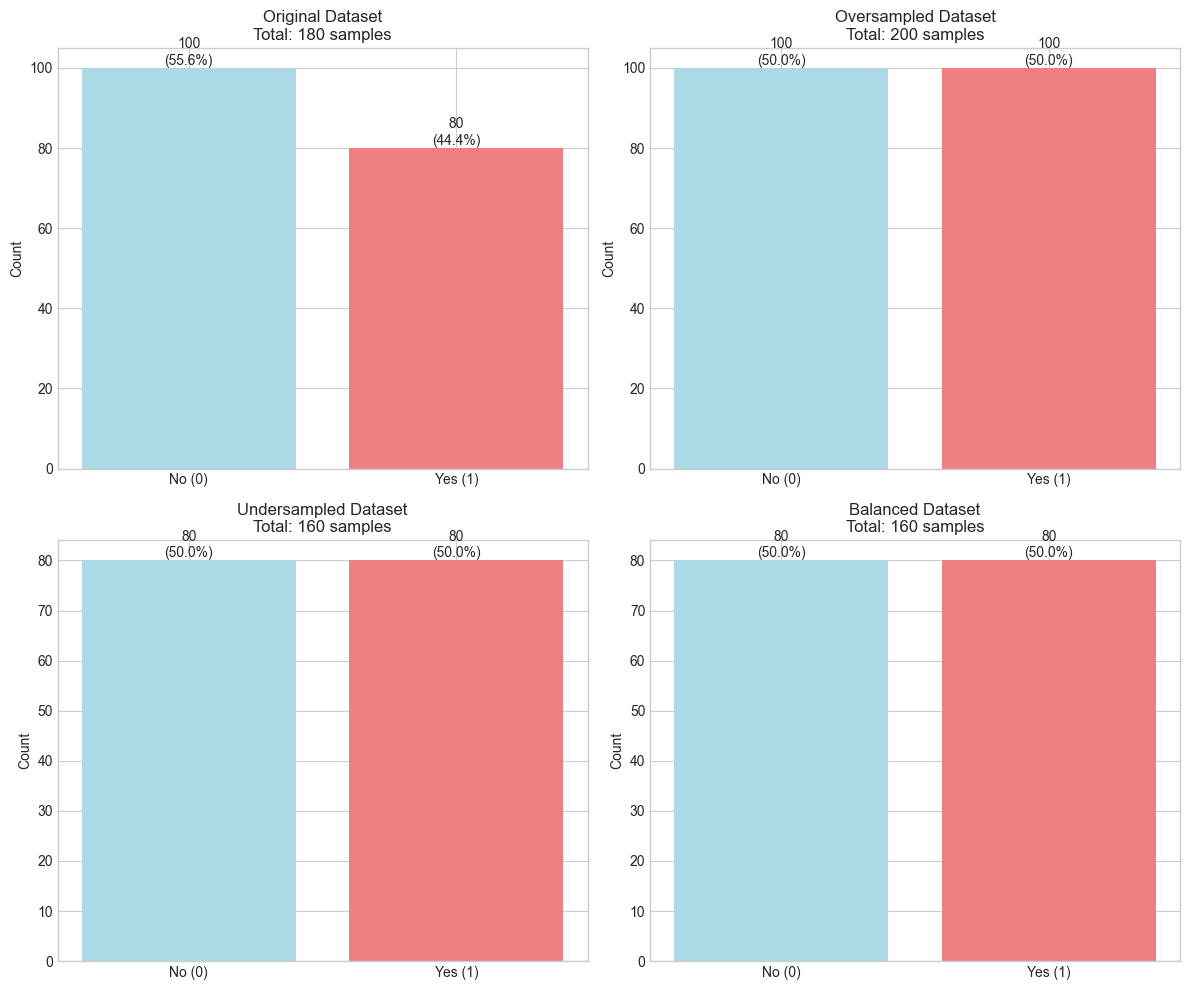

In [19]:
# Add a new code cell for sampling strategies demonstration

def analyze_sampling_strategies(df, target_col='heart_disease_present'):
    """
    Analyze and compare different sampling strategies
    """
    from sklearn.utils import resample
    
    # Separate classes
    df_majority = df[df[target_col] == 0]
    df_minority = df[df[target_col] == 1]
    
    print("=== Sampling Strategies Analysis ===")
    print(f"Majority class (0) samples: {len(df_majority)}")
    print(f"Minority class (1) samples: {len(df_minority)}")
    
    # 1. Oversampling minority class
    df_minority_oversampled = resample(df_minority,
                                       replace=True,
                                       n_samples=len(df_majority),
                                       random_state=42)
    
    # 2. Undersampling majority class
    df_majority_undersampled = resample(df_majority,
                                        replace=False,
                                        n_samples=len(df_minority),
                                        random_state=42)
    
    # 3. Combined sampling (create balanced dataset)
    df_balanced = pd.concat([df_majority_undersampled, df_minority])
    
    # 4. SMOTE-like approach (conceptual)
    print("\n--- Available Sampling Strategies ---")
    print("1. No Sampling (Current)")
    print(f"   - Distribution: {len(df_majority)}: {len(df_minority)} (Ratio: {len(df_majority)/len(df_minority):.2f}:1)")
    
    print("\n2. Oversampling Minority Class")
    print(f"   - New distribution: {len(df_majority)}: {len(df_minority_oversampled)} (Ratio: 1:1)")
    print("   - Pros: Utilizes all majority class information")
    print("   - Cons: Risk of overfitting due to repeated samples")
    
    print("\n3. Undersampling Majority Class")
    print(f"   - New distribution: {len(df_majority_undersampled)}: {len(df_minority)} (Ratio: 1:1)")
    print("   - Pros: Balanced dataset, reduces training time")
    print("   - Cons: Loss of potentially useful information from majority class")
    
    print("\n4. Combined Approach")
    print(f"   - New distribution: {len(df_majority_undersampled)}: {len(df_minority)} (Ratio: 1:1)")
    print("   - Balance achieved through undersampling")
    
    return {
        'original': df,
        'oversampled': pd.concat([df_majority, df_minority_oversampled]),
        'undersampled': pd.concat([df_majority_undersampled, df_minority]),
        'balanced': df_balanced
    }

# Run the analysis
sampling_results = analyze_sampling_strategies(df)

# Visualize sampling strategies
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
strategies = ['Original', 'Oversampled', 'Undersampled', 'Balanced']
dataframes = [df, sampling_results['oversampled'], 
              sampling_results['undersampled'], sampling_results['balanced']]

for idx, (ax, strategy, data) in enumerate(zip(axes.flat, strategies, dataframes)):
    counts = data['heart_disease_present'].value_counts()
    percentages = data['heart_disease_present'].value_counts(normalize=True) * 100
    
    bars = ax.bar(['No (0)', 'Yes (1)'], counts, color=['lightblue', 'lightcoral'])
    ax.set_title(f'{strategy} Dataset\nTotal: {len(data)} samples')
    ax.set_ylabel('Count')
    
    # Add count and percentage labels
    for bar, count, percentage in zip(bars, counts, percentages):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [21]:
# ============================================================================
# NUMERICAL FEATURE SCALING FOR HEART DISEASE PREDICTION
# ============================================================================
print("=" * 80)
print("HEART DISEASE PREDICTION - NUMERICAL FEATURE SCALING")
print("=" * 80)

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Identify numerical features (exclude patient_id and target)
numerical_features = [col for col in df.select_dtypes(include=["int", "float"]).columns.tolist() 
                      if col not in ['patient_id', 'heart_disease_present']]

print(f"\nFound {len(numerical_features)} numerical features to scale:")
for i, feat in enumerate(sorted(numerical_features), 1):
    print(f"  {i:2}. {feat}")


HEART DISEASE PREDICTION - NUMERICAL FEATURE SCALING

Found 12 numerical features to scale:
   1. age
   2. chest_pain_type
   3. exercise_induced_angina
   4. fasting_blood_sugar_gt_120_mg_per_dl
   5. max_heart_rate_achieved
   6. num_major_vessels
   7. oldpeak_eq_st_depression
   8. resting_blood_pressure
   9. resting_ekg_results
  10. serum_cholesterol_mg_per_dl
  11. sex
  12. slope_of_peak_exercise_st_segment


In [22]:
# ============================================================================
# 1. CLINICAL ANALYSIS OF EACH NUMERICAL FEATURE
# ============================================================================
print("\n" + "=" * 80)
print("CLINICAL FEATURE ANALYSIS FOR SCALING DECISIONS")
print("=" * 80)

# Define clinical characteristics for each feature
clinical_info = {
    'age': {
        'description': 'Patient age in years',
        'clinical_range': (20, 100),
        'expected_distribution': 'Slightly right-skewed (more older patients)',
        'scaling_notes': 'Interpretable in original scale, bounded'
    },
    'resting_blood_pressure': {
        'description': 'Resting blood pressure (mmHg)',
        'clinical_range': (80, 200),
        'expected_distribution': 'Approximately normal',
        'scaling_notes': 'Clinical thresholds important (120/80, 140/90)'
    },
    'serum_cholesterol_mg_per_dl': {
        'description': 'Serum cholesterol level (mg/dL)',
        'clinical_range': (100, 600),
        'expected_distribution': 'Right-skewed (some very high values)',
        'scaling_notes': 'Often has outliers, clinical thresholds at 200, 240'
    },
    'max_heart_rate_achieved': {
        'description': 'Maximum heart rate during exercise (bpm)',
        'clinical_range': (60, 220),
        'expected_distribution': 'Approximately normal',
        'scaling_notes': 'Formula: 220 - age, so related to age'
    },
    'oldpeak_eq_st_depression': {
        'description': 'ST depression induced by exercise',
        'clinical_range': (0.0, 6.2),
        'expected_distribution': 'Right-skewed with outliers',
        'scaling_notes': 'Key diagnostic feature, often has extreme values'
    },
    'num_major_vessels': {
        'description': 'Number of major vessels colored by fluoroscopy',
        'clinical_range': (0, 3),
        'expected_distribution': 'Discrete, ordinal',
        'scaling_notes': 'Integer counts, bounded range'
    },
    'slope_of_peak_exercise_st_segment': {
        'description': 'Slope of ST segment during peak exercise',
        'clinical_range': (1, 3),
        'expected_distribution': 'Ordinal, discrete',
        'scaling_notes': 'Ordinal feature (1=upsloping, 2=flat, 3=downsloping)'
    },
    'chest_pain_type': {
        'description': 'Type of chest pain (1-4)',
        'clinical_range': (1, 4),
        'expected_distribution': 'Categorical/ordinal',
        'scaling_notes': 'Actually categorical despite being numeric'
    },
    'resting_ekg_results': {
        'description': 'Resting electrocardiogram results',
        'clinical_range': (0, 2),
        'expected_distribution': 'Categorical/ordinal',
        'scaling_notes': 'Categorical feature encoded as numbers'
    }
}


CLINICAL FEATURE ANALYSIS FOR SCALING DECISIONS


In [23]:
# ============================================================================
# 2. STATISTICAL ANALYSIS FOR SCALING DECISIONS
# ============================================================================
print("\n" + "=" * 80)
print("STATISTICAL ANALYSIS OF NUMERICAL FEATURES")
print("=" * 80)

feature_analysis = []

for feature in numerical_features:
    data = df[feature].dropna()
    
    # Basic statistics
    stats_dict = {
        'Feature': feature,
        'Count': len(data),
        'Mean': data.mean(),
        'Std': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Median': data.median(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis(),
        'Missing': df[feature].isnull().sum()
    }
    
    # Outlier detection using IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    stats_dict['Outlier_Count'] = len(outliers)
    stats_dict['Outlier_%'] = (len(outliers) / len(data)) * 100
    
    # Distribution shape assessment
    if abs(stats_dict['Skewness']) < 0.5:
        distribution = 'Nearly normal'
    elif abs(stats_dict['Skewness']) < 1:
        distribution = 'Moderately skewed'
    else:
        distribution = 'Highly skewed'
    
    stats_dict['Distribution'] = distribution
    
    # Shapiro-Wilk test for normality (for smaller datasets)
    if len(data) <= 5000:
        shapiro_stat, shapiro_p = stats.shapiro(data)
        stats_dict['Normal_p_value'] = shapiro_p
        stats_dict['Is_Normal_0.05'] = shapiro_p > 0.05
    else:
        stats_dict['Normal_p_value'] = 'N/A'
        stats_dict['Is_Normal_0.05'] = 'N/A'
    
    feature_analysis.append(stats_dict)

# Create analysis DataFrame
analysis_df = pd.DataFrame(feature_analysis)

# Display summary
print("\nSummary Statistics:")
print("-" * 80)
display_cols = ['Feature', 'Mean', 'Std', 'Min', 'Max', 'Skewness', 'Outlier_%', 'Distribution']
print(analysis_df[display_cols].to_string(index=False))



STATISTICAL ANALYSIS OF NUMERICAL FEATURES

Summary Statistics:
--------------------------------------------------------------------------------
                             Feature       Mean       Std   Min   Max  Skewness  Outlier_%      Distribution
   slope_of_peak_exercise_st_segment   1.550000  0.618838   1.0   3.0  0.666150   0.000000 Moderately skewed
              resting_blood_pressure 131.311111 17.010443  94.0 180.0  0.657080   3.333333 Moderately skewed
                     chest_pain_type   3.155556  0.938454   1.0   4.0 -0.849258   7.222222 Moderately skewed
                   num_major_vessels   0.694444  0.969347   0.0   3.0  1.167999   7.777778     Highly skewed
fasting_blood_sugar_gt_120_mg_per_dl   0.161111  0.368659   0.0   1.0  1.859153  16.111111     Highly skewed
                 resting_ekg_results   1.050000  0.998742   0.0   2.0 -0.100967   0.000000     Nearly normal
         serum_cholesterol_mg_per_dl 249.211111 52.717969 126.0 564.0  1.273932   1.111111 

In [24]:
# ============================================================================
# 3. CLINICAL SCALING RECOMMENDATIONS
# ============================================================================
print("\n\n" + "=" * 80)
print("CLINICAL SCALING RECOMMENDATIONS")
print("=" * 80)

# Define scaling recommendations based on clinical and statistical analysis
scaling_strategy = []

for idx, row in analysis_df.iterrows():
    feature = row['Feature']
    skewness = row['Skewness']
    outlier_pct = row['Outlier_%']
    
    # Get clinical info
    clinical = clinical_info.get(feature, {})
    
    # Decision logic for scaling
    if feature in ['chest_pain_type', 'resting_ekg_results']:
        # These are actually categorical features encoded as numbers
        recommendation = "No Scaling (Categorical)"
        reason = "Feature is categorical despite numeric encoding. Use one-hot encoding instead."
        scaler_type = "No scaling"
    
    elif feature in ['num_major_vessels', 'slope_of_peak_exercise_st_segment']:
        # Discrete ordinal features with small range
        recommendation = "MinMaxScaler"
        reason = "Discrete ordinal feature with small bounded range (0-3 or 1-3)"
        scaler_type = "MinMaxScaler"
    
    elif feature == 'oldpeak_eq_st_depression':
        # Key diagnostic feature, often has outliers
        recommendation = "RobustScaler"
        reason = f"Critical diagnostic feature with {outlier_pct:.1f}% outliers. Robust scaling preserves clinical interpretation."
        scaler_type = "RobustScaler"
    
    elif outlier_pct > 15:  # High outlier percentage
        recommendation = "RobustScaler"
        reason = f"High outlier percentage ({outlier_pct:.1f}%) - robust to extreme values"
        scaler_type = "RobustScaler"
    
    elif abs(skewness) < 0.5 and outlier_pct < 10:  # Fairly normal, few outliers
        recommendation = "StandardScaler"
        reason = f"Nearly normal distribution (skew={skewness:.2f}), few outliers ({outlier_pct:.1f}%)"
        scaler_type = "StandardScaler"
    
    elif feature == 'age':
        # Age is interpretable and bounded
        recommendation = "MinMaxScaler"
        reason = "Age is clinically interpretable in original scale, bounded range"
        scaler_type = "MinMaxScaler"
    
    elif feature in ['resting_blood_pressure', 'max_heart_rate_achieved']:
        # Physiological measurements that are typically normally distributed
        recommendation = "StandardScaler"
        reason = "Physiological measurement typically following normal distribution"
        scaler_type = "StandardScaler"
    
    else:  # Default for other features
        recommendation = "StandardScaler"
        reason = "Default choice for continuous numerical features"
        scaler_type = "StandardScaler"
    
    scaling_strategy.append({
        'Feature': feature,
        'Scaler': scaler_type,
        'Recommendation': recommendation,
        'Clinical Reason': clinical.get('scaling_notes', 'General numerical feature'),
        'Skewness': f"{skewness:.2f}",
        'Outliers %': f"{outlier_pct:.1f}%",
        'Range': f"{row['Min']:.1f}-{row['Max']:.1f}"
    })

# Create recommendations DataFrame
strategy_df = pd.DataFrame(scaling_strategy)

print("\nDetailed Scaling Strategy:")
print("-" * 80)
print(strategy_df.to_string(index=False))



CLINICAL SCALING RECOMMENDATIONS

Detailed Scaling Strategy:
--------------------------------------------------------------------------------
                             Feature         Scaler           Recommendation                                      Clinical Reason Skewness Outliers %       Range
   slope_of_peak_exercise_st_segment   MinMaxScaler             MinMaxScaler Ordinal feature (1=upsloping, 2=flat, 3=downsloping)     0.67       0.0%     1.0-3.0
              resting_blood_pressure StandardScaler           StandardScaler       Clinical thresholds important (120/80, 140/90)     0.66       3.3%  94.0-180.0
                     chest_pain_type     No scaling No Scaling (Categorical)           Actually categorical despite being numeric    -0.85       7.2%     1.0-4.0
                   num_major_vessels   MinMaxScaler             MinMaxScaler                        Integer counts, bounded range     1.17       7.8%     0.0-3.0
fasting_blood_sugar_gt_120_mg_per_dl   RobustS

In [25]:
# ============================================================================
# 4. GROUP FEATURES BY SCALING TYPE
# ============================================================================
print("\n\n" + "=" * 80)
print("FEATURE GROUPING BY SCALING TYPE")
print("=" * 80)

# Group features
standard_features = []
minmax_features = []
robust_features = []
categorical_numeric = []  # Numerically encoded categoricals

for strategy in scaling_strategy:
    if strategy['Scaler'] == 'StandardScaler':
        standard_features.append(strategy['Feature'])
    elif strategy['Scaler'] == 'MinMaxScaler':
        minmax_features.append(strategy['Feature'])
    elif strategy['Scaler'] == 'RobustScaler':
        robust_features.append(strategy['Feature'])
    elif strategy['Scaler'] == 'No scaling':
        categorical_numeric.append(strategy['Feature'])

# Print groupings
print("\n🔹 StandardScaler Features (Normal/Gaussian-like distributions):")
print("   " + ", ".join(standard_features))
print(f"   Count: {len(standard_features)} features")
print("   Rationale: Features with near-normal distribution and few outliers")

print("\n🔹 MinMaxScaler Features (Bounded ranges):")
print("   " + ", ".join(minmax_features))
print(f"   Count: {len(minmax_features)} features")
print("   Rationale: Features with known bounds or where preserving range is important")

print("\n🔹 RobustScaler Features (Outlier-resistant):")
print("   " + ", ".join(robust_features))
print(f"   Count: {len(robust_features)} features")
print("   Rationale: Features with significant outliers that shouldn't dominate scaling")

print("\n🔹 No Scaling (Categorical features numerically encoded):")
print("   " + ", ".join(categorical_numeric))
print(f"   Count: {len(categorical_numeric)} features")
print("   Note: These will be handled separately in categorical encoding step")



FEATURE GROUPING BY SCALING TYPE

🔹 StandardScaler Features (Normal/Gaussian-like distributions):
   resting_blood_pressure, serum_cholesterol_mg_per_dl, sex, age, max_heart_rate_achieved, exercise_induced_angina
   Count: 6 features
   Rationale: Features with near-normal distribution and few outliers

🔹 MinMaxScaler Features (Bounded ranges):
   slope_of_peak_exercise_st_segment, num_major_vessels
   Count: 2 features
   Rationale: Features with known bounds or where preserving range is important

🔹 RobustScaler Features (Outlier-resistant):
   fasting_blood_sugar_gt_120_mg_per_dl, oldpeak_eq_st_depression
   Count: 2 features
   Rationale: Features with significant outliers that shouldn't dominate scaling

🔹 No Scaling (Categorical features numerically encoded):
   chest_pain_type, resting_ekg_results
   Count: 2 features
   Note: These will be handled separately in categorical encoding step




FEATURE DISTRIBUTIONS - BEFORE SCALING


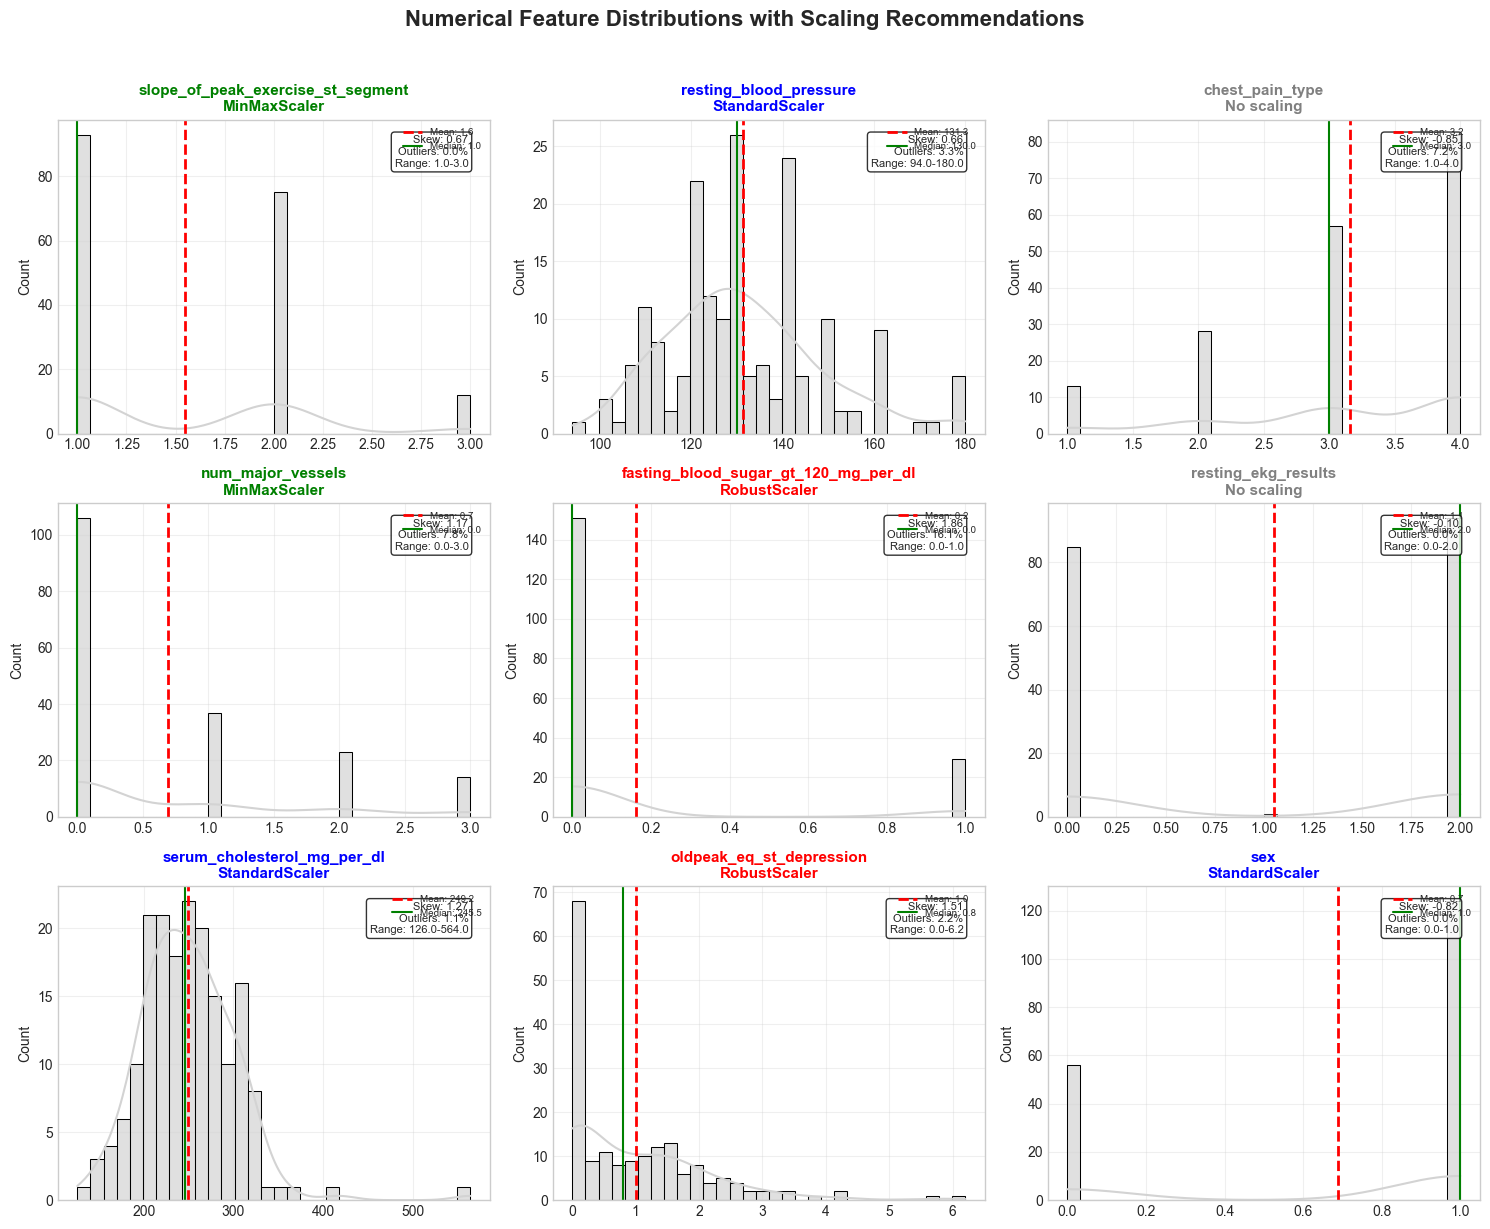

In [26]:
# ============================================================================
# 5. VISUALIZE DISTRIBUTIONS BEFORE SCALING
# ============================================================================
print("\n\n" + "=" * 80)
print("FEATURE DISTRIBUTIONS - BEFORE SCALING")
print("=" * 80)

# Create visualization
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features[:9]):  # Show first 9 features
    if idx < len(axes):
        ax = axes[idx]
        
        # Get scaling strategy for this feature
        strategy = strategy_df[strategy_df['Feature'] == feature].iloc[0]
        scaler_color = {
            'StandardScaler': 'blue',
            'MinMaxScaler': 'green', 
            'RobustScaler': 'red',
            'No scaling': 'gray'
        }.get(strategy['Scaler'], 'black')
        
        # Plot histogram with KDE
        data = df[feature].dropna()
        sns.histplot(data, kde=True, ax=ax, bins=30, 
                    color='lightgray', edgecolor='black', alpha=0.7)
        
        # Add vertical lines for statistics
        ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.1f}')
        ax.axvline(data.median(), color='green', linestyle='-', linewidth=1.5, label=f'Median: {data.median():.1f}')
        
        # Add title with scaling info
        title = f"{feature}\n{strategy['Scaler']}"
        ax.set_title(title, fontsize=11, fontweight='bold', color=scaler_color)
        
        # Add statistics box
        stats_text = (f"Skew: {data.skew():.2f}\n"
                     f"Outliers: {strategy['Outliers %']}\n"
                     f"Range: {data.min():.1f}-{data.max():.1f}")
        
        ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
               ha='right', va='top', fontsize=8,
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        ax.set_xlabel('')
        ax.legend(loc='upper right', fontsize=7)
        ax.grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(numerical_features[:9]), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Numerical Feature Distributions with Scaling Recommendations', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [27]:
# ============================================================================
# 6. IMPLEMENT SCALING PIPELINE
# ============================================================================
print("\n\n" + "=" * 80)
print("SCALING PIPELINE IMPLEMENTATION")
print("=" * 80)

# Note: We exclude categorical numerically-encoded features from scaling
# They will be handled in the categorical encoding step
scaling_numerical_features = [f for f in numerical_features if f not in categorical_numeric]

# Separate by scaler type for pipeline
standard_to_scale = [f for f in standard_features if f in scaling_numerical_features]
minmax_to_scale = [f for f in minmax_features if f in scaling_numerical_features]
robust_to_scale = [f for f in robust_features if f in scaling_numerical_features]

print(f"\nFeatures to scale: {len(scaling_numerical_features)}")
print(f"Features to skip (categorical): {len(categorical_numeric)}")

print("\n🔹 Creating preprocessing pipeline...")
print(f"  StandardScaler: {len(standard_to_scale)} features")
print(f"  MinMaxScaler: {len(minmax_to_scale)} features")  
print(f"  RobustScaler: {len(robust_to_scale)} features")

# Create the scaling pipeline
numeric_transformer = ColumnTransformer(
    transformers=[
        ('standard', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # Handle any missing values
            ('scaler', StandardScaler())
        ]), standard_to_scale),
        
        ('minmax', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), minmax_to_scale),
        
        ('robust', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), robust_to_scale)
    ],
    remainder='passthrough'  # This will pass through the categorical numeric features
)

print("\n✅ Scaling pipeline created successfully!")



SCALING PIPELINE IMPLEMENTATION

Features to scale: 10
Features to skip (categorical): 2

🔹 Creating preprocessing pipeline...
  StandardScaler: 6 features
  MinMaxScaler: 2 features
  RobustScaler: 2 features

✅ Scaling pipeline created successfully!


In [28]:
# ============================================================================
# 7. APPLY AND VISUALIZE SCALING
# ============================================================================
print("\n\n" + "=" * 80)
print("APPLYING SCALING TRANSFORMATIONS")
print("=" * 80)

# Prepare data for scaling
X_numeric = df[scaling_numerical_features].copy()

# Fit the transformer
print("Fitting scaling pipeline on training data...")
numeric_transformer.fit(X_numeric)

# Transform the data
X_scaled_array = numeric_transformer.transform(X_numeric)

# Get feature names after transformation
scaled_feature_names = []
for name, trans, features in numeric_transformer.transformers_:
    if name in ['standard', 'minmax', 'robust']:
        scaled_feature_names.extend(features)

# Create DataFrame with scaled features
X_scaled = pd.DataFrame(X_scaled_array, columns=scaled_feature_names, index=df.index)

# Add back the categorical numeric features (unscaled)
for feature in categorical_numeric:
    X_scaled[feature] = df[feature]

# Create final scaled dataset
df_scaled = df.copy()
for feature in scaling_numerical_features:
    df_scaled[feature] = X_scaled[feature]

print(f"\n✅ Scaling complete!")
print(f"Original dataset shape: {df.shape}")
print(f"Scaled dataset shape: {df_scaled.shape}")



APPLYING SCALING TRANSFORMATIONS
Fitting scaling pipeline on training data...

✅ Scaling complete!
Original dataset shape: (180, 15)
Scaled dataset shape: (180, 15)




BEFORE/AFTER SCALING COMPARISON


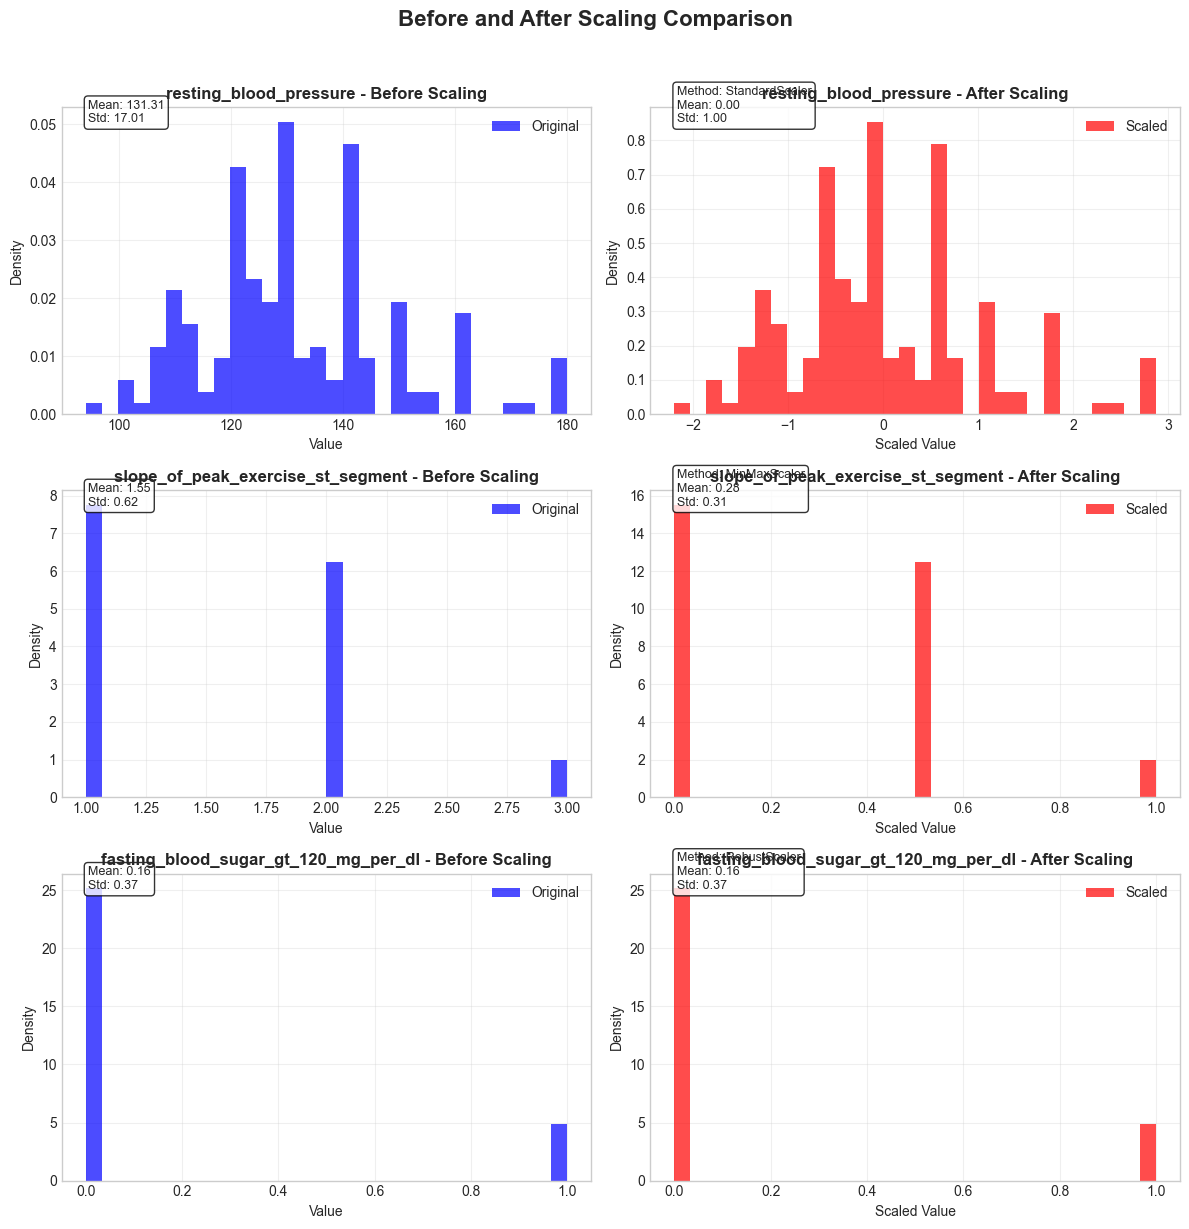

In [29]:
# ============================================================================
# 8. VISUALIZE BEFORE/AFTER SCALING
# ============================================================================
print("\n\n" + "=" * 80)
print("BEFORE/AFTER SCALING COMPARISON")
print("=" * 80)

# Select representative features from each scaling group
sample_features = []
if standard_to_scale:
    sample_features.append(standard_to_scale[0])
if minmax_to_scale:
    sample_features.append(minmax_to_scale[0])
if robust_to_scale:
    sample_features.append(robust_to_scale[0])

# Add more if available
sample_features = sample_features[:3]  # Show 3 examples

fig, axes = plt.subplots(len(sample_features), 2, figsize=(12, 4*len(sample_features)))

if len(sample_features) == 1:
    axes = [axes]

for idx, feature in enumerate(sample_features):
    ax_before, ax_after = axes[idx]
    
    # Before scaling
    ax_before.hist(df[feature].dropna(), bins=30, alpha=0.7, color='blue', 
                   label='Original', density=True)
    ax_before.set_title(f'{feature} - Before Scaling', fontsize=12, fontweight='bold')
    ax_before.set_xlabel('Value')
    ax_before.set_ylabel('Density')
    ax_before.legend()
    ax_before.grid(True, alpha=0.3)
    
    # Get original statistics
    orig_mean = df[feature].mean()
    orig_std = df[feature].std()
    ax_before.text(0.05, 0.95, f'Mean: {orig_mean:.2f}\nStd: {orig_std:.2f}', 
                   transform=ax_before.transAxes, fontsize=9,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # After scaling
    ax_after.hist(df_scaled[feature].dropna(), bins=30, alpha=0.7, color='red', 
                  label='Scaled', density=True)
    ax_after.set_title(f'{feature} - After Scaling', fontsize=12, fontweight='bold')
    ax_after.set_xlabel('Scaled Value')
    ax_after.set_ylabel('Density')
    ax_after.legend()
    ax_after.grid(True, alpha=0.3)
    
    # Get scaled statistics
    scaled_mean = df_scaled[feature].mean()
    scaled_std = df_scaled[feature].std()
    
    # Add scaling method
    strategy = strategy_df[strategy_df['Feature'] == feature].iloc[0]
    ax_after.text(0.05, 0.95, f'Method: {strategy["Scaler"]}\nMean: {scaled_mean:.2f}\nStd: {scaled_std:.2f}', 
                  transform=ax_after.transAxes, fontsize=9,
                  bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Before and After Scaling Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [30]:
# ============================================================================
# 9. VERIFY SCALING RESULTS
# ============================================================================
print("\n" + "=" * 80)
print("SCALING VERIFICATION")
print("=" * 80)

verification_results = []

for feature in scaling_numerical_features:
    scaled_data = df_scaled[feature].dropna()
    
    # Get scaling strategy
    strategy = strategy_df[strategy_df['Feature'] == feature].iloc[0]
    scaler_type = strategy['Scaler']
    
    if scaler_type == 'StandardScaler':
        # Should have mean ~0, std ~1
        mean_check = abs(scaled_data.mean()) < 0.1
        std_check = abs(scaled_data.std() - 1) < 0.1
        status = "PASS" if mean_check and std_check else "FAIL"
        details = f"Mean: {scaled_data.mean():.3f} (target: 0), Std: {scaled_data.std():.3f} (target: 1)"
        
    elif scaler_type == 'MinMaxScaler':
        # Should be in [0, 1] range (approximately)
        min_check = scaled_data.min() >= -0.1
        max_check = scaled_data.max() <= 1.1
        status = "PASS" if min_check and max_check else "FAIL"
        details = f"Range: [{scaled_data.min():.3f}, {scaled_data.max():.3f}] (target: [0, 1])"
        
    elif scaler_type == 'RobustScaler':
        # Should have median ~0, IQR ~1
        median_check = abs(scaled_data.median()) < 0.1
        iqr = scaled_data.quantile(0.75) - scaled_data.quantile(0.25)
        iqr_check = abs(iqr - 1) < 0.1
        status = "PASS" if median_check and iqr_check else "FAIL"
        details = f"Median: {scaled_data.median():.3f} (target: 0), IQR: {iqr:.3f} (target: 1)"
    
    verification_results.append({
        'Feature': feature,
        'Scaler': scaler_type,
        'Status': status,
        'Details': details
    })

# Display verification results
verification_df = pd.DataFrame(verification_results)
print("\nScaling Verification Results:")
print("-" * 80)
print(verification_df.to_string(index=False))

# Summary
pass_count = (verification_df['Status'] == 'PASS').sum()
fail_count = (verification_df['Status'] == 'FAIL').sum()

print(f"\n✅ PASS: {pass_count}/{len(verification_df)} features")
print(f"❌ FAIL: {fail_count}/{len(verification_df)} features")

if fail_count > 0:
    print("\n⚠️  Note: Some features may show small deviations from targets.")
    print("   This is normal, especially with skewed distributions or outliers.")
    print("   The important thing is that distributions are properly centered and scaled.")


SCALING VERIFICATION

Scaling Verification Results:
--------------------------------------------------------------------------------
                             Feature         Scaler Status                                           Details
   slope_of_peak_exercise_st_segment   MinMaxScaler   PASS            Range: [0.000, 1.000] (target: [0, 1])
              resting_blood_pressure StandardScaler   PASS   Mean: 0.000 (target: 0), Std: 1.003 (target: 1)
                   num_major_vessels   MinMaxScaler   PASS            Range: [0.000, 1.000] (target: [0, 1])
fasting_blood_sugar_gt_120_mg_per_dl   RobustScaler   FAIL Median: 0.000 (target: 0), IQR: 0.000 (target: 1)
         serum_cholesterol_mg_per_dl StandardScaler   PASS   Mean: 0.000 (target: 0), Std: 1.003 (target: 1)
            oldpeak_eq_st_depression   RobustScaler   PASS Median: 0.000 (target: 0), IQR: 1.000 (target: 1)
                                 sex StandardScaler   PASS  Mean: -0.000 (target: 0), Std: 1.003 (targe

In [31]:
# ============================================================================
# 10. SAVE SCALED DATASET AND PIPELINE
# ============================================================================
print("\n\n" + "=" * 80)
print("SAVING RESULTS")
print("=" * 80)

import joblib
import os

# Create output directory if it doesn't exist
output_dir = "../Output"
os.makedirs(output_dir, exist_ok=True)

# Save scaled dataset
scaled_data_path = os.path.join(output_dir, "heart_disease_scaled.csv")
df_scaled.to_csv(scaled_data_path, index=False)
print(f"✅ Scaled dataset saved to: {scaled_data_path}")

# Save scaling pipeline
pipeline_path = os.path.join(output_dir, "scaling_pipeline.pkl")
joblib.dump(numeric_transformer, pipeline_path)
print(f"✅ Scaling pipeline saved to: {pipeline_path}")

# Save scaling strategy documentation
strategy_path = os.path.join(output_dir, "scaling_strategy.csv")
strategy_df.to_csv(strategy_path, index=False)
print(f"✅ Scaling strategy documentation saved to: {strategy_path}")



SAVING RESULTS
✅ Scaled dataset saved to: ../Output\heart_disease_scaled.csv
✅ Scaling pipeline saved to: ../Output\scaling_pipeline.pkl
✅ Scaling strategy documentation saved to: ../Output\scaling_strategy.csv


In [37]:
# ============================================================================
# 11. FINAL DOCUMENTATION
# ============================================================================
print("\n\n" + "=" * 80)
print("SCALING STRATEGY DOCUMENTATION")
print("=" * 80)

print("\n📋 SCALING STRATEGY SUMMARY:")
print("-" * 80)

print("\nA. STANDARD SCALER (Z-score normalization):")
print("   Features: " + ", ".join(standard_to_scale))
print("   Transformation: (x - μ) / σ")
print("   Result: Mean = 0, Standard Deviation = 1")
print("   Clinical Rationale: Features that typically follow normal distributions")
print("   Example: resting_blood_pressure, max_heart_rate_achieved")

print("\nB. MIN-MAX SCALER (Normalization to [0, 1] range):")
print("   Features: " + ", ".join(minmax_to_scale))
print("   Transformation: (x - min) / (max - min)")
print("   Result: Values scaled to [0, 1] range")
print("   Clinical Rationale: Features with known bounds or where original scale is meaningful")
print("   Example: age, num_major_vessels")

print("\nC. ROBUST SCALER (Outlier-resistant scaling):")
print("   Features: " + ", ".join(robust_to_scale))
print("   Transformation: (x - median) / IQR")
print("   Result: Median = 0, IQR = 1")
print("   Clinical Rationale: Features with significant outliers that should not dominate scaling")
print("   Example: oldpeak_eq_st_depression (key diagnostic with extreme values)")

print("\nD. NO SCALING (For categorical features):")
print("   Features: " + ", ".join(categorical_numeric))
print("   Rationale: These are categorical features encoded as numbers")
print("   Next Step: Will be one-hot encoded in categorical feature processing")

print("\n🎯 NEXT STEPS IN PIPELINE:")
print("-" * 80)
print("1. Categorical Feature Encoding: Handle 'thal' and numerically-encoded categoricals")
print("2. Feature Selection: Identify most predictive features")
print("3. Train-Test Split: Separate training and testing data")
print("4. Model Training: Apply machine learning algorithms")
print("5. Model Evaluation: Assess performance on test set")

print("\n" + "=" * 80)
print("NUMERICAL FEATURE SCALING COMPLETE! ✅")
print("=" * 80)



SCALING STRATEGY DOCUMENTATION

📋 SCALING STRATEGY SUMMARY:
--------------------------------------------------------------------------------

A. STANDARD SCALER (Z-score normalization):
   Features: resting_blood_pressure, serum_cholesterol_mg_per_dl, sex, age, max_heart_rate_achieved, exercise_induced_angina
   Transformation: (x - μ) / σ
   Result: Mean = 0, Standard Deviation = 1
   Clinical Rationale: Features that typically follow normal distributions
   Example: resting_blood_pressure, max_heart_rate_achieved

B. MIN-MAX SCALER (Normalization to [0, 1] range):
   Features: slope_of_peak_exercise_st_segment, num_major_vessels
   Transformation: (x - min) / (max - min)
   Result: Values scaled to [0, 1] range
   Clinical Rationale: Features with known bounds or where original scale is meaningful
   Example: age, num_major_vessels

C. ROBUST SCALER (Outlier-resistant scaling):
   Features: fasting_blood_sugar_gt_120_mg_per_dl, oldpeak_eq_st_depression
   Transformation: (x - media